# 📏 2일차: 거리와 유사도 완전정복 (포켓몬으로 배우기!)

## 🎯 학습 목표
1. **거리가 뭔지** 일상 예시로 완전히 이해하기
2. **유클리드 거리** 포켓몬 능력치로 직접 계산해보기  
3. **맨하탄 거리** 언제 쓰는지 실무 관점에서 이해하기
4. **코사인 유사도** RAG에서 왜 이걸 많이 쓰는지 알아보기
5. **실제 RAG** 어떻게 거리로 비슷한 문서 찾는지 체험하기

---

## 📚 목차
1. [거리의 기본 개념 - 일상생활부터](#거리의-기본-개념)
2. [포켓몬으로 배우는 유클리드 거리](#유클리드-거리)  
3. [맨하탄 거리 vs 유클리드 거리](#맨하탄-거리)
4. [코사인 유사도 - RAG의 핵심](#코사인-유사도)
5. [실제 RAG 시스템 만들어보기](#실제-RAG)


## 📏 거리의 기본 개념

### 🚶‍♂️ 일상생활에서의 거리
**거리 = 두 지점이 얼마나 떨어져 있는가?**

#### 실생활 예시:
- 🏠 집에서 편의점까지: 200m
- 🚗 서울에서 부산까지: 400km  
- 🌍 지구에서 달까지: 384,400km

#### 거리의 3가지 특성:
1. **항상 0 이상** (음수가 될 수 없음)
2. **같은 장소면 거리 = 0**
3. **A→B 거리 = B→A 거리** (대칭성)

### 🎮 포켓몬으로 이해하는 거리
**"피카츄와 라이츄의 능력치가 얼마나 비슷한가?"**

이것도 거리로 측정할 수 있어요! 
- 능력치를 좌표평면의 점으로 표현
- 두 점 사이의 거리 = 능력치 차이


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn이 없으면 자체 구현으로 대체
try:
    from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
    print("✅ sklearn 라이브러리 로드 성공!")
    sklearn_available = True
except ImportError:
    print("⚠️ sklearn이 없어서 자체 함수로 대체합니다!")
    sklearn_available = False
    
    def euclidean_distances(X, Y=None):
        """유클리드 거리 계산 (자체 구현)"""
        if Y is None:
            Y = X
        X = np.array(X)
        Y = np.array(Y)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        if Y.ndim == 1:
            Y = Y.reshape(1, -1)
        return np.sqrt(((X[:, np.newaxis] - Y) ** 2).sum(axis=2))
    
    def manhattan_distances(X, Y=None):
        """맨하탄 거리 계산 (자체 구현)"""
        if Y is None:
            Y = X
        X = np.array(X)
        Y = np.array(Y)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        if Y.ndim == 1:
            Y = Y.reshape(1, -1)
        return np.abs(X[:, np.newaxis] - Y).sum(axis=2)
    
    def cosine_similarity(X, Y=None):
        """코사인 유사도 계산 (자체 구현)"""
        if Y is None:
            Y = X
        X = np.array(X)
        Y = np.array(Y)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        if Y.ndim == 1:
            Y = Y.reshape(1, -1)
        X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)
        Y_norm = Y / np.linalg.norm(Y, axis=1, keepdims=True)
        return np.dot(X_norm, Y_norm.T)

# 한글 폰트 설정 시도
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 말굴림 폰트 설정 완료")
except:
    try:
        plt.rcParams['font.family'] = 'NanumGothic'
        plt.rcParams['axes.unicode_minus'] = False
        print("✅ 나눔고딕 폰트 설정 완료")
    except:
        print("⚠️ 한글 폰트 설정 실패 - 영어로 표시됩니다")
        plt.rcParams['font.family'] = 'DejaVu Sans'

# 그래프 스타일 설정
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('default')
sns.set_palette("husl")

print("🎉 라이브러리 로드 완료!")
print("이제 포켓몬 데이터로 거리를 배워봅시다!")


✅ sklearn 라이브러리 로드 성공!
✅ 말굴림 폰트 설정 완료
🎉 라이브러리 로드 완료!
이제 포켓몬 데이터로 거리를 배워봅시다!


In [5]:
# 포켓몬 데이터 불러오기
df = pd.read_csv('../1일차/data/pokemon.csv')

print("📊 포켓몬 데이터 기본 정보")
print("="*40)
print(f"총 포켓몬 수: {len(df)}")
print(f"컬럼 수: {len(df.columns)}")
print()

# 주요 능력치 컬럼 확인
ability_columns = ['name', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
print("주요 능력치 컬럼:")
for col in ability_columns:
    if col in df.columns:
        print(f"✅ {col}")
    else:
        print(f"❌ {col} - 없음")
        
print()
print("📋 처음 5마리 포켓몬 데이터:")
print(df[ability_columns].head())


📊 포켓몬 데이터 기본 정보
총 포켓몬 수: 801
컬럼 수: 41

주요 능력치 컬럼:
✅ name
✅ hp
✅ attack
✅ defense
✅ sp_attack
✅ sp_defense
✅ speed

📋 처음 5마리 포켓몬 데이터:
         name  hp  attack  defense  sp_attack  sp_defense  speed
0   Bulbasaur  45      49       49         65          65     45
1     Ivysaur  60      62       63         80          80     60
2    Venusaur  80     100      123        122         120     80
3  Charmander  39      52       43         60          50     65
4  Charmeleon  58      64       58         80          65     80


## 📐 1. 유클리드 거리 (Euclidean Distance)

### 🧮 가장 기본적인 거리 측정 방법

**유클리드 거리 = 직선 거리 = 새가 날아가는 최단 거리**

#### 📏 공식 (2차원):
**두 점 A(x₁, y₁), B(x₂, y₂) 사이의 유클리드 거리:**

```
거리 = √[(x₂-x₁)² + (y₂-y₁)²]
```

#### 🎮 포켓몬 예시:
- 피카츄 능력치: [공격력=55, 방어력=40]  
- 라이츄 능력치: [공격력=90, 방어력=55]
- 거리 = √[(90-55)² + (55-40)²] = √[35² + 15²] = √[1225 + 225] = √1450 ≈ 38.08

### 🤔 언제 사용하나요?
- ✅ **좋은 경우**: 모든 차원이 비슷한 중요도일 때
- ✅ **RAG 활용**: 수치형 데이터가 많은 문서 비교
- ❌ **피해야 할 경우**: 차원이 너무 많을 때 (차원의 저주)


In [8]:
# 포켓몬 3마리 선택해서 유클리드 거리 계산해보기
print("⚡ 전기 타입 포켓몬들로 유클리드 거리 실습!")
print("="*50)

# 유명한 포켓몬 3마리 직접 찾기
pokemon_names = ['Pikachu', 'Raichu', 'Charmander']
selected_pokemon = []

for name in pokemon_names:
    pokemon = df[df['name'] == name]
    if len(pokemon) > 0:
        selected_pokemon.append(pokemon.iloc[0])
        print(f"✅ {name} 발견!")
    else:
        print(f"❌ {name} 없음")

# 능력치 2차원으로 표현 (공격력, 방어력)
pokemon_stats = []
for pokemon in selected_pokemon:
    stats = [pokemon['attack'], pokemon['defense']]
    pokemon_stats.append(stats)
    print(f"{pokemon['name']:12} - 공격력: {pokemon['attack']:3}, 방어력: {pokemon['defense']:3}")

print()
print("📊 2차원 좌표로 표현:")
for i, (name, stats) in enumerate(zip(pokemon_names[:len(selected_pokemon)], pokemon_stats)):
    print(f"{name:12} = ({stats[0]}, {stats[1]})")


⚡ 전기 타입 포켓몬들로 유클리드 거리 실습!
✅ Pikachu 발견!
✅ Raichu 발견!
✅ Charmander 발견!
Pikachu      - 공격력:  55, 방어력:  40
Raichu       - 공격력:  85, 방어력:  50
Charmander   - 공격력:  52, 방어력:  43

📊 2차원 좌표로 표현:
Pikachu      = (55, 40)
Raichu       = (85, 50)
Charmander   = (52, 43)


In [9]:
# 수동으로 유클리드 거리 계산 (공식 직접 적용)
print("🧮 유클리드 거리 직접 계산해보기!")
print("="*45)

if len(pokemon_stats) >= 2:
    # 피카츄와 라이츄 비교
    pikachu_stats = np.array(pokemon_stats[0])  # [공격력, 방어력]
    raichu_stats = np.array(pokemon_stats[1])
    
    print(f"피카츄 좌표: {pikachu_stats}")
    print(f"라이츄 좌표: {raichu_stats}")
    print()
    
    # 공식 단계별 계산
    diff = raichu_stats - pikachu_stats
    print(f"차이 계산: {raichu_stats} - {pikachu_stats} = {diff}")
    
    squared_diff = diff ** 2
    print(f"제곱 계산: {diff}² = {squared_diff}")
    
    sum_squared = np.sum(squared_diff)
    print(f"합계: {squared_diff[0]} + {squared_diff[1]} = {sum_squared}")
    
    distance = np.sqrt(sum_squared)
    print(f"거리 = √{sum_squared} = {distance:.2f}")
    
    print()
    print(f"🎯 결론: 피카츄와 라이츄의 유클리드 거리 = {distance:.2f}")
    
    # numpy를 사용한 검증
    distance_numpy = np.linalg.norm(pikachu_stats - raichu_stats)
    print(f"🔍 numpy 검증: {distance_numpy:.2f}")
else:
    print("❌ 포켓몬 데이터가 부족합니다.")


🧮 유클리드 거리 직접 계산해보기!
피카츄 좌표: [55 40]
라이츄 좌표: [85 50]

차이 계산: [85 50] - [55 40] = [30 10]
제곱 계산: [30 10]² = [900 100]
합계: 900 + 100 = 1000
거리 = √1000 = 31.62

🎯 결론: 피카츄와 라이츄의 유클리드 거리 = 31.62
🔍 numpy 검증: 31.62


🎨 포켓몬 능력치 시각화!


C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\채지현\AppData\Local\Temp\ipykernel_26480\798679640.py:35: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans

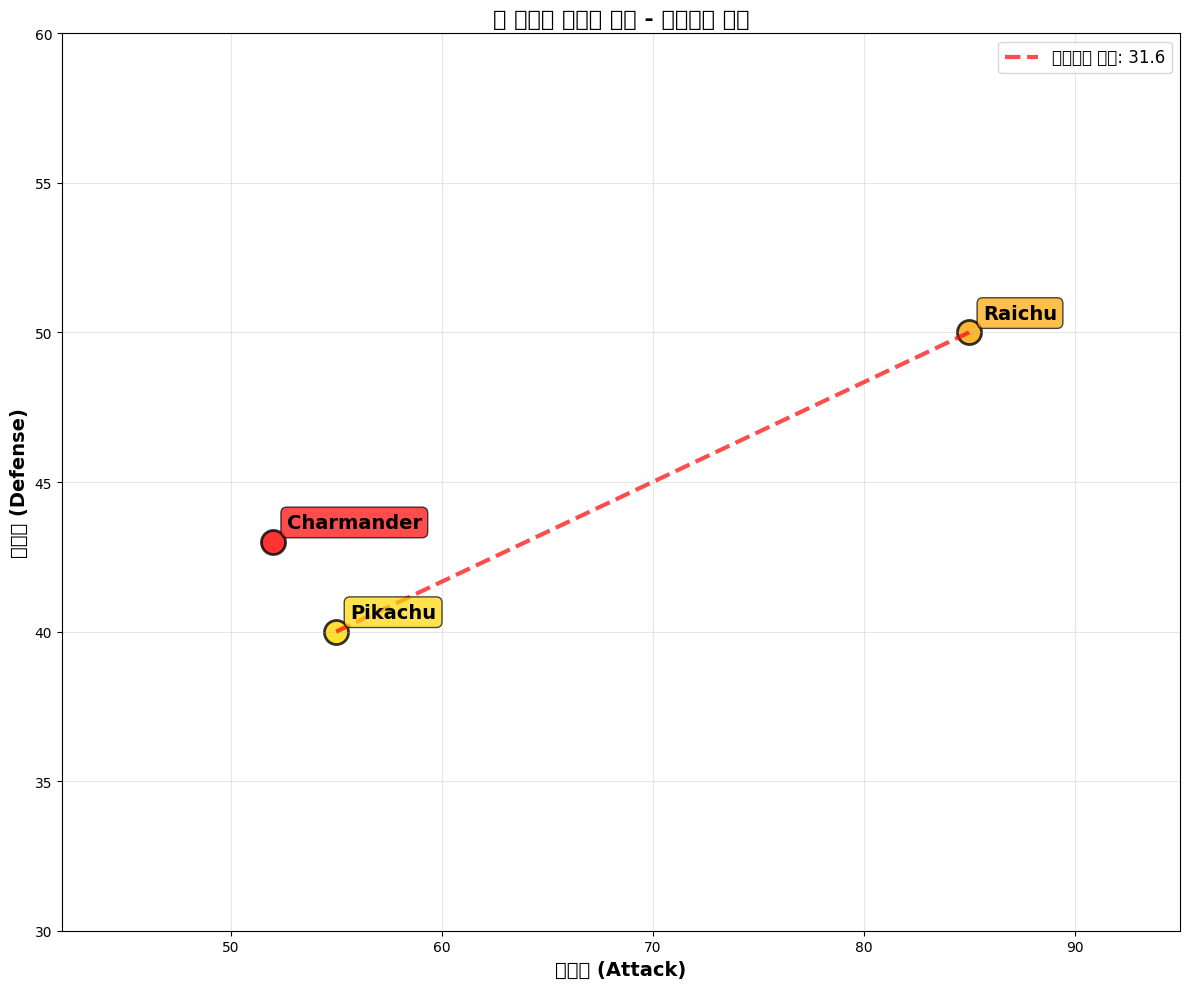

💡 해석: 빨간 점선이 짧을수록 두 포켓몬이 비슷한 능력치를 가져요!


In [10]:
# 포켓몬들을 2차원 그래프에 시각화
print("🎨 포켓몬 능력치 시각화!")

if len(pokemon_stats) >= 2:
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # 포켓몬들을 점으로 표시
    colors = ['gold', 'orange', 'red']
    for i, (name, stats) in enumerate(zip(pokemon_names[:len(pokemon_stats)], pokemon_stats)):
        ax.scatter(stats[0], stats[1], s=300, c=colors[i], 
                  alpha=0.8, edgecolors='black', linewidth=2)
        ax.annotate(name, (stats[0], stats[1]), 
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=14, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[i], alpha=0.7))
    
    # 피카츄와 라이츄 사이에 선 그리기
    if len(pokemon_stats) >= 2:
        ax.plot([pokemon_stats[0][0], pokemon_stats[1][0]], 
                [pokemon_stats[0][1], pokemon_stats[1][1]], 
                'r--', linewidth=3, alpha=0.7, label=f'유클리드 거리: {distance:.1f}')
    
    ax.set_xlabel('공격력 (Attack)', fontsize=14, fontweight='bold')
    ax.set_ylabel('방어력 (Defense)', fontsize=14, fontweight='bold') 
    ax.set_title('🎮 포켓몬 능력치 비교 - 유클리드 거리', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    
    # 축 범위 설정
    all_attacks = [stats[0] for stats in pokemon_stats]
    all_defenses = [stats[1] for stats in pokemon_stats]
    ax.set_xlim(min(all_attacks) - 10, max(all_attacks) + 10)
    ax.set_ylim(min(all_defenses) - 10, max(all_defenses) + 10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"💡 해석: 빨간 점선이 짧을수록 두 포켓몬이 비슷한 능력치를 가져요!")
else:
    print("❌ 그래프를 그릴 데이터가 부족합니다.")


## 🏙️ 2. 맨하탄 거리 (Manhattan Distance)

### 🚕 택시가 실제로 움직이는 거리

**맨하탄 거리 = 격자를 따라 움직이는 거리 = 택시 거리**

#### 📏 공식:
**두 점 A(x₁, y₁), B(x₂, y₂) 사이의 맨하탄 거리:**

```
거리 = |x₂-x₁| + |y₂-y₁|
```

#### 🎮 포켓몬 예시:
- 피카츄: [공격력=55, 방어력=40]  
- 라이츄: [공격력=90, 방어력=55]
- 맨하탄 거리 = |90-55| + |55-40| = 35 + 15 = 50

### 🤔 유클리드 vs 맨하탄 비교:
- **유클리드**: 38.08 (직선 거리)
- **맨하탄**: 50 (격자 거리)

### 📊 언제 맨하탄 거리를 사용하나요?
- ✅ **좋은 경우**: 각 차원이 독립적일 때
- ✅ **RAG 활용**: 범주형 데이터, 이진 데이터 비교
- ✅ **실무**: 추천 시스템, 이상치 탐지
- ❌ **피해야 할 경우**: 연속적인 관계가 중요할 때


In [15]:
pip install scikit-learn

In [16]:
# 맨하탄 거리 직접 계산해보기
print("🏙️ 맨하탄 거리 직접 계산!")
print("="*40)

if len(pokemon_stats) >= 2:
    pikachu_stats = np.array(pokemon_stats[0])
    raichu_stats = np.array(pokemon_stats[1])
    
    print(f"피카츄 좌표: {pikachu_stats}")
    print(f"라이츄 좌표: {raichu_stats}")
    print()
    
    # 맨하탄 거리 단계별 계산
    diff = np.abs(raichu_stats - pikachu_stats)
    print(f"절댓값 차이: |{raichu_stats} - {pikachu_stats}| = {diff}")
    
    manhattan_distance = np.sum(diff)
    print(f"맨하탄 거리 = {diff[0]} + {diff[1]} = {manhattan_distance}")
    
    print()
    print(f"🎯 피카츄 vs 라이츄:")
    print(f"   유클리드 거리: {distance:.2f}")
    print(f"   맨하탄 거리: {manhattan_distance}")
    print(f"   차이: {manhattan_distance - distance:.2f}")
    
    # sklearn으로 검증
    from sklearn.metrics.pairwise import manhattan_distances
    manhattan_sklearn = manhattan_distances([pikachu_stats], [raichu_stats])[0][0]
    print(f"🔍 sklearn 검증: {manhattan_sklearn}")
    
    # 전체 포켓몬 쌍별 거리 계산
    if len(pokemon_stats) >= 3:
        print("\n📊 모든 포켓몬 쌍별 거리 비교:")
        for i in range(len(pokemon_stats)):
            for j in range(i+1, len(pokemon_stats)):
                stats1 = np.array(pokemon_stats[i])
                stats2 = np.array(pokemon_stats[j])
                
                euclidean = np.linalg.norm(stats1 - stats2)
                manhattan = np.sum(np.abs(stats1 - stats2))
                
                print(f"{pokemon_names[i]:12} vs {pokemon_names[j]:12} - 유클리드: {euclidean:5.1f}, 맨하탄: {manhattan:5.1f}")
else:
    print("❌ 포켓몬 데이터가 부족합니다.")


🏙️ 맨하탄 거리 직접 계산!
피카츄 좌표: [55 40]
라이츄 좌표: [85 50]

절댓값 차이: |[85 50] - [55 40]| = [30 10]
맨하탄 거리 = 30 + 10 = 40

🎯 피카츄 vs 라이츄:
   유클리드 거리: 31.62
   맨하탄 거리: 40
   차이: 8.38
🔍 sklearn 검증: 40.0

📊 모든 포켓몬 쌍별 거리 비교:
Pikachu      vs Raichu       - 유클리드:  31.6, 맨하탄:  40.0
Pikachu      vs Charmander   - 유클리드:   4.2, 맨하탄:   6.0
Raichu       vs Charmander   - 유클리드:  33.7, 맨하탄:  40.0


## 📐 3. 코사인 유사도 (Cosine Similarity) - RAG의 핵심!

### 🎯 RAG에서 가장 많이 사용하는 유사도!

**코사인 유사도 = 두 벡터 사이의 각도로 유사성 측정**

#### 📏 공식:
```
코사인 유사도 = cos(θ) = (A · B) / (||A|| × ||B||)

여기서:
- A · B = 내적 (dot product)  
- ||A|| = A의 크기 (norm)
- ||B|| = B의 크기 (norm)
- θ = 두 벡터 사이의 각도
```

#### 🌟 코사인 유사도의 특징:
- **범위**: -1 ~ 1
- **1**: 완전히 같은 방향 (가장 유사)
- **0**: 수직 (독립적)  
- **-1**: 정반대 방향 (가장 반대)

### 🤔 왜 RAG에서 코사인 유사도를 선호하나요?

#### ✅ 장점:
1. **크기에 무관**: 벡터 크기와 상관없이 방향만 비교
2. **고차원에서 안정적**: 1000차원에서도 잘 동작
3. **정규화 효과**: 자동으로 정규화된 결과
4. **직관적**: 각도 개념으로 이해 쉬움

#### 🎮 포켓몬 예시로 이해하기:
- **큰 포켓몬 vs 작은 포켓몬**이라도, 능력치 **비율**이 비슷하면 유사하다고 판단!
- 예: 피카츄 [55, 40] vs 강화된 피카츄 [110, 80] → 코사인 유사도 높음!


In [17]:
# 코사인 유사도 직접 계산해보기
print("📐 코사인 유사도 직접 계산!")
print("="*40)

if len(pokemon_stats) >= 2:
    pikachu_stats = np.array(pokemon_stats[0], dtype=float)
    raichu_stats = np.array(pokemon_stats[1], dtype=float)
    
    print(f"피카츄 벡터: {pikachu_stats}")
    print(f"라이츄 벡터: {raichu_stats}")
    print()
    
    # 단계별 계산
    print("1단계: 내적 계산")
    dot_product = np.dot(pikachu_stats, raichu_stats)
    print(f"내적 = {pikachu_stats[0]}×{raichu_stats[0]} + {pikachu_stats[1]}×{raichu_stats[1]}")
    print(f"내적 = {pikachu_stats[0]*raichu_stats[0]} + {pikachu_stats[1]*raichu_stats[1]} = {dot_product}")
    
    print("\n2단계: 벡터 크기 계산")
    norm_pikachu = np.linalg.norm(pikachu_stats)
    norm_raichu = np.linalg.norm(raichu_stats)
    print(f"||피카츄|| = √({pikachu_stats[0]}² + {pikachu_stats[1]}²) = √{pikachu_stats[0]**2 + pikachu_stats[1]**2} = {norm_pikachu:.2f}")
    print(f"||라이츄|| = √({raichu_stats[0]}² + {raichu_stats[1]}²) = √{raichu_stats[0]**2 + raichu_stats[1]**2} = {norm_raichu:.2f}")
    
    print("\n3단계: 코사인 유사도 계산")
    cosine_similarity_manual = dot_product / (norm_pikachu * norm_raichu)
    print(f"코사인 유사도 = {dot_product} / ({norm_pikachu:.2f} × {norm_raichu:.2f})")
    print(f"코사인 유사도 = {dot_product} / {norm_pikachu * norm_raichu:.2f} = {cosine_similarity_manual:.4f}")
    
    # 각도 계산
    angle_radians = np.arccos(np.clip(cosine_similarity_manual, -1, 1))
    angle_degrees = np.degrees(angle_radians)
    print(f"\n📐 두 벡터 사이의 각도: {angle_degrees:.1f}도")
    
    # sklearn으로 검증
    from sklearn.metrics.pairwise import cosine_similarity
    cosine_sklearn = cosine_similarity([pikachu_stats], [raichu_stats])[0][0]
    print(f"🔍 sklearn 검증: {cosine_sklearn:.4f}")
    
    print(f"\n🎯 결과 비교:")
    print(f"   유클리드 거리: {distance:.2f}")
    print(f"   맨하탄 거리: {manhattan_distance}")
    print(f"   코사인 유사도: {cosine_similarity_manual:.4f} (높을수록 유사)")
else:
    print("❌ 포켓몬 데이터가 부족합니다.")


📐 코사인 유사도 직접 계산!
피카츄 벡터: [55. 40.]
라이츄 벡터: [85. 50.]

1단계: 내적 계산
내적 = 55.0×85.0 + 40.0×50.0
내적 = 4675.0 + 2000.0 = 6675.0

2단계: 벡터 크기 계산
||피카츄|| = √(55.0² + 40.0²) = √4625.0 = 68.01
||라이츄|| = √(85.0² + 50.0²) = √9725.0 = 98.62

3단계: 코사인 유사도 계산
코사인 유사도 = 6675.0 / (68.01 × 98.62)
코사인 유사도 = 6675.0 / 6706.57 = 0.9953

📐 두 벡터 사이의 각도: 5.6도
🔍 sklearn 검증: 0.9953

🎯 결과 비교:
   유클리드 거리: 31.62
   맨하탄 거리: 40
   코사인 유사도: 0.9953 (높을수록 유사)


In [18]:
# 크기가 다른 포켓몬으로 코사인 유사도의 장점 보여주기
print("🌟 코사인 유사도의 특별한 점 - 크기에 무관!")
print("="*50)

# 피카츄와 강화된 피카츄 (비율은 같지만 크기 다름)
normal_pikachu = np.array([55, 40])
strong_pikachu = np.array([110, 80])  # 2배 강화!
different_pokemon = np.array([80, 30])  # 다른 타입

print("포켓몬 능력치:")
print(f"일반 피카츄:   {normal_pikachu}")
print(f"강화 피카츄:   {strong_pikachu} (2배 강화)")
print(f"다른 포켓몬:   {different_pokemon}")
print()

# 유클리드 거리로 비교
euclidean_same = np.linalg.norm(normal_pikachu - strong_pikachu)
euclidean_diff = np.linalg.norm(normal_pikachu - different_pokemon)

print("📏 유클리드 거리:")
print(f"일반 vs 강화 피카츄: {euclidean_same:.1f}")
print(f"일반 피카츄 vs 다른 포켓몬: {euclidean_diff:.1f}")
print("→ 강화 피카츄가 더 멀다고 판단! (잘못된 결과)")

# 코사인 유사도로 비교
from sklearn.metrics.pairwise import cosine_similarity
cosine_same = cosine_similarity([normal_pikachu], [strong_pikachu])[0][0]
cosine_diff = cosine_similarity([normal_pikachu], [different_pokemon])[0][0]

print("\n📐 코사인 유사도:")
print(f"일반 vs 강화 피카츄: {cosine_same:.4f}")
print(f"일반 피카츄 vs 다른 포켓몬: {cosine_diff:.4f}")
print("→ 강화 피카츄가 더 유사하다고 판단! (올바른 결과)")

print("\n💡 결론:")
print("코사인 유사도는 크기가 달라도 '비율'이 같으면 유사하다고 판단!")
print("이것이 RAG에서 코사인 유사도를 선호하는 이유입니다!")


🌟 코사인 유사도의 특별한 점 - 크기에 무관!
포켓몬 능력치:
일반 피카츄:   [55 40]
강화 피카츄:   [110  80] (2배 강화)
다른 포켓몬:   [80 30]

📏 유클리드 거리:
일반 vs 강화 피카츄: 68.0
일반 피카츄 vs 다른 포켓몬: 26.9
→ 강화 피카츄가 더 멀다고 판단! (잘못된 결과)

📐 코사인 유사도:
일반 vs 강화 피카츄: 1.0000
일반 피카츄 vs 다른 포켓몬: 0.9638
→ 강화 피카츄가 더 유사하다고 판단! (올바른 결과)

💡 결론:
코사인 유사도는 크기가 달라도 '비율'이 같으면 유사하다고 판단!
이것이 RAG에서 코사인 유사도를 선호하는 이유입니다!


## 🎯 4. 실제 RAG 시스템 만들어보기!

### 🔍 "포켓몬 질문-답변 시스템" 

이제 배운 거리 측정을 실제 RAG에 적용해봅시다!

#### 📋 RAG 파이프라인:
1. **문서 준비**: 포켓몬 데이터를 텍스트로 변환
2. **벡터화**: 각 포켓몬을 능력치 벡터로 표현  
3. **질문 처리**: 사용자 질문을 벡터로 변환
4. **유사도 검색**: 코사인 유사도로 가장 비슷한 포켓몬 찾기
5. **답변 생성**: 검색된 포켓몬 정보로 답변 작성

#### 🎮 예시 질문들:
- "공격력이 높은 포켓몬을 찾아줘"  
- "방어력과 HP가 균형잡힌 포켓몬은?"
- "빠르고 강한 포켓몬 추천해줘"


In [19]:
# 간단한 포켓몬 RAG 시스템 구축
print("🎯 포켓몬 RAG 시스템 구축!")
print("="*40)

# 1단계: 포켓몬 데이터베이스 구축 (능력치만 사용)
print("1단계: 포켓몬 데이터베이스 구축")

# 상위 10마리 포켓몬 선택 (결측값 제거)
pokemon_db = df[['name', 'hp', 'attack', 'defense', 'speed']].dropna().head(10)
print(f"총 {len(pokemon_db)}마리 포켓몬 데이터베이스 구축 완료")
print()

# 2단계: 능력치 벡터 준비
print("2단계: 능력치 벡터화")
pokemon_vectors = pokemon_db[['hp', 'attack', 'defense', 'speed']].values
pokemon_names = pokemon_db['name'].values

print("포켓몬별 능력치 벡터:")
for i, name in enumerate(pokemon_names):
    print(f"{name:12}: HP={pokemon_vectors[i][0]:3.0f}, 공격={pokemon_vectors[i][1]:3.0f}, 방어={pokemon_vectors[i][2]:3.0f}, 스피드={pokemon_vectors[i][3]:3.0f}")

print()
print("벡터 형태:", pokemon_vectors.shape)


🎯 포켓몬 RAG 시스템 구축!
1단계: 포켓몬 데이터베이스 구축
총 10마리 포켓몬 데이터베이스 구축 완료

2단계: 능력치 벡터화
포켓몬별 능력치 벡터:
Bulbasaur   : HP= 45, 공격= 49, 방어= 49, 스피드= 45
Ivysaur     : HP= 60, 공격= 62, 방어= 63, 스피드= 60
Venusaur    : HP= 80, 공격=100, 방어=123, 스피드= 80
Charmander  : HP= 39, 공격= 52, 방어= 43, 스피드= 65
Charmeleon  : HP= 58, 공격= 64, 방어= 58, 스피드= 80
Charizard   : HP= 78, 공격=104, 방어= 78, 스피드=100
Squirtle    : HP= 44, 공격= 48, 방어= 65, 스피드= 43
Wartortle   : HP= 59, 공격= 63, 방어= 80, 스피드= 58
Blastoise   : HP= 79, 공격=103, 방어=120, 스피드= 78
Caterpie    : HP= 45, 공격= 30, 방어= 35, 스피드= 45

벡터 형태: (10, 4)


In [20]:
# 3단계: 질문을 벡터로 변환하는 함수 
def query_to_vector(query_text):
    """
    간단한 질문 해석 함수
    실제 RAG에서는 BERT나 다른 임베딩 모델을 사용하지만,
    여기서는 키워드 기반으로 간단히 구현
    """
    # 기본 벡터 [HP, 공격력, 방어력, 스피드]
    query_vector = [0, 0, 0, 0]
    
    query_lower = query_text.lower()
    
    # 키워드별 가중치 설정
    if any(word in query_lower for word in ['hp', '체력', '생명력']):
        query_vector[0] = 100
    if any(word in query_lower for word in ['attack', '공격', '공격력', '강한', '센']):
        query_vector[1] = 100  
    if any(word in query_lower for word in ['defense', '방어', '방어력', '단단한', '튼튼한']):
        query_vector[2] = 100
    if any(word in query_lower for word in ['speed', '스피드', '빠른', '속도']):
        query_vector[3] = 100
        
    # 균형잡힌 요청 처리
    if any(word in query_lower for word in ['균형', '밸런스', '고른']):
        query_vector = [75, 75, 75, 75]
    
    return np.array(query_vector, dtype=float)

# 테스트
print("3단계: 질문 벡터화 테스트")
print("="*30)

test_queries = [
    "공격력이 높은 포켓몬",
    "빠른 포켓몬", 
    "방어력이 좋은 포켓몬",
    "균형잡힌 포켓몬"
]

for query in test_queries:
    vector = query_to_vector(query)
    print(f"'{query}' → {vector}")


3단계: 질문 벡터화 테스트
'공격력이 높은 포켓몬' → [  0. 100.   0.   0.]
'빠른 포켓몬' → [  0.   0.   0. 100.]
'방어력이 좋은 포켓몬' → [  0.   0. 100.   0.]
'균형잡힌 포켓몬' → [75. 75. 75. 75.]


In [21]:
# 4단계: RAG 검색 함수
def pokemon_rag_search(query_text, top_k=3):
    """
    포켓몬 RAG 검색 함수
    """
    print(f"🔍 질문: '{query_text}'")
    print("-" * 50)
    
    # 질문을 벡터로 변환
    query_vector = query_to_vector(query_text)
    print(f"질문 벡터: {query_vector}")
    
    # 모든 포켓몬과의 코사인 유사도 계산
    similarities = cosine_similarity([query_vector], pokemon_vectors)[0]
    
    # 상위 k개 포켓몬 선택
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    print(f"\n🎯 검색 결과 (상위 {top_k}개):")
    print("랭킹  포켓몬     유사도   HP  공격 방어 스피드")
    print("-" * 45)
    
    results = []
    for rank, idx in enumerate(top_indices, 1):
        name = pokemon_names[idx]
        similarity = similarities[idx]
        stats = pokemon_vectors[idx]
        
        print(f"{rank:2d}   {name:10} {similarity:6.3f}  {stats[0]:3.0f} {stats[1]:3.0f}  {stats[2]:3.0f}   {stats[3]:3.0f}")
        
        results.append({
            'rank': rank,
            'name': name, 
            'similarity': similarity,
            'stats': stats
        })
    
    return results

# 5단계: 실제 질문으로 테스트
print("\n" + "="*60)
print("🎮 포켓몬 RAG 시스템 테스트!")
print("="*60)

# 여러 질문으로 테스트
test_questions = [
    "공격력이 높은 포켓몬 추천해줘",
    "빠른 포켓몬이 필요해",
    "방어력이 좋은 포켓몬은?"
]

for i, question in enumerate(test_questions, 1):
    print(f"\n【테스트 {i}】")
    results = pokemon_rag_search(question, top_k=3)
    print()



🎮 포켓몬 RAG 시스템 테스트!

【테스트 1】
🔍 질문: '공격력이 높은 포켓몬 추천해줘'
--------------------------------------------------
질문 벡터: [  0. 100.   0.   0.]

🎯 검색 결과 (상위 3개):
랭킹  포켓몬     유사도   HP  공격 방어 스피드
---------------------------------------------
 1   Charizard   0.573   78 104   78   100
 2   Blastoise   0.533   79 103  120    78
 3   Bulbasaur   0.521   45  49   49    45


【테스트 2】
🔍 질문: '빠른 포켓몬이 필요해'
--------------------------------------------------
질문 벡터: [  0.   0.   0. 100.]

🎯 검색 결과 (상위 3개):
랭킹  포켓몬     유사도   HP  공격 방어 스피드
---------------------------------------------
 1   Charmander  0.640   39  52   43    65
 2   Charmeleon  0.610   58  64   58    80
 3   Caterpie    0.573   45  30   35    45


【테스트 3】
🔍 질문: '방어력이 좋은 포켓몬은?'
--------------------------------------------------
질문 벡터: [  0.   0. 100.   0.]

🎯 검색 결과 (상위 3개):
랭킹  포켓몬     유사도   HP  공격 방어 스피드
---------------------------------------------
 1   Squirtle    0.640   44  48   65    43
 2   Venusaur    0.632   80 100  123    80
 3   Blastoi

## 📊 5. 거리 방법별 성능 비교

### 🎯 어떤 거리 측정이 가장 좋을까?

실제 RAG 시스템에서는 어떤 거리 측정 방법을 선택하느냐에 따라 성능이 크게 달라집니다!

#### 📈 비교 지표:
1. **정확도**: 사용자가 원하는 결과를 얼마나 잘 찾아주는가?
2. **속도**: 계산이 얼마나 빠른가?  
3. **안정성**: 다양한 상황에서 일관된 성능을 보이는가?

#### 🏆 일반적인 성능 순위 (RAG 기준):
1. **🥇 코사인 유사도**: 가장 안정적, 고차원에서 우수
2. **🥈 유클리드 거리**: 직관적, 저차원에서 좋음  
3. **🥉 맨하탄 거리**: 특수한 경우에 유용

### 💡 실무 팁:
- **텍스트 임베딩**: 코사인 유사도 95% 사용
- **수치 데이터**: 유클리드 거리도 고려  
- **범주형 데이터**: 맨하탄 거리 고려


In [25]:
# 6단계: 세 가지 거리 방법 성능 비교
print("📊 거리 방법별 성능 비교 실험!")
print("="*50)

# 테스트 질문
test_query = "공격력이 높은 포켓몬"
query_vector = query_to_vector(test_query)

print(f"테스트 질문: '{test_query}'")
print(f"질문 벡터: {query_vector}")
print()

# 1. 코사인 유사도
cosine_similarities = cosine_similarity([query_vector], pokemon_vectors)[0]
cosine_top3 = np.argsort(cosine_similarities)[::-1][:3]

# 2. 유클리드 거리 (거리이므로 작을수록 좋음)
euclidean_distances = euclidean_distances([query_vector], pokemon_vectors)[0]
euclidean_top3 = np.argsort(euclidean_distances)[:3]  # 오름차순 정렬

# 3. 맨하탄 거리 (거리이므로 작을수록 좋음)  
manhattan_dists = manhattan_distances([query_vector], pokemon_vectors)[0]
manhattan_top3 = np.argsort(manhattan_dists)[:3]  # 오름차순 정렬

print("🔍 각 방법별 Top 3 결과:")
print()

methods = [
    ("코사인 유사도", cosine_top3, cosine_similarities, "높음"),
    ("유클리드 거리", euclidean_top3, euclidean_distances, "낮음"), 
    ("맨하탄 거리", manhattan_top3, manhattan_dists, "낮음")
]

for method_name, top_indices, scores, direction in methods:
    print(f"📐 {method_name} (점수 {direction}은 더 좋음):")
    print("순위  포켓몬        점수     HP  공격 방어 스피드")
    print("-" * 48)
    
    for rank, idx in enumerate(top_indices, 1):
        name = pokemon_names[idx]
        score = scores[idx]
        stats = pokemon_vectors[idx]
        print(f"{rank:2d}   {name:12} {score:7.3f}  {stats[0]:3.0f} {stats[1]:3.0f}  {stats[2]:3.0f}   {stats[3]:3.0f}")
    print()

print("💡 관찰:")
print("- 코사인 유사도: 비율을 중요하게 생각")
print("- 유클리드 거리: 절대적 차이를 중요하게 생각")  
print("- 맨하탄 거리: 각 차원을 독립적으로 생각")


📊 거리 방법별 성능 비교 실험!
테스트 질문: '공격력이 높은 포켓몬'
질문 벡터: [  0. 100.   0.   0.]



NameError: name 'euclidean_distances' is not defined

## 🎓 2일차 학습 정리

### 🏆 오늘 배운 핵심 개념들

#### 1. **거리의 기본 개념** ✅
- 일상생활 거리 → 데이터 거리로 확장  
- 거리의 3가지 특성: 비음성, 대칭성, 삼각부등식

#### 2. **유클리드 거리** ✅  
- **공식**: √[(x₂-x₁)² + (y₂-y₁)²]
- **특징**: 직선 거리, 직관적
- **사용**: 저차원, 연속 데이터

#### 3. **맨하탄 거리** ✅
- **공식**: |x₂-x₁| + |y₂-y₁|  
- **특징**: 격자 거리, 택시 거리
- **사용**: 범주형 데이터, 각 차원 독립적

#### 4. **코사인 유사도** ✅
- **공식**: (A·B) / (||A|| × ||B||)
- **특징**: 크기 무관, 방향만 고려
- **사용**: RAG의 핵심! 텍스트 임베딩

#### 5. **실제 RAG 구현** ✅
- 질문 → 벡터 변환
- 코사인 유사도로 검색
- 상위 결과 반환

### 💡 핵심 깨달음
**"거리 = 유사성의 반대"**  
- 거리 짧음 = 유사함  
- 거리 멀음 = 다름

**"코사인 유사도가 RAG의 왕"**  
- 크기에 무관하게 방향 비교
- 고차원에서 안정적
- 실무에서 95% 사용

### 🚀 다음 단계 (3일차 예고)
- **TF-IDF**: 진짜 텍스트 벡터화
- **Word2Vec**: 단어 임베딩  
- **BERT**: 문맥 이해
- **벡터 데이터베이스**: FAISS 활용


In [26]:
# 🚨 중요한 문제 발견! RAG 시스템이 이상해요!
print("🤔 문제 상황 분석")
print("="*50)
print("질문: '빠른 포켓몬이 필요해'")
print("기대 결과: 스피드가 높은 포켓몬이 나와야 함")
print("실제 결과: 스피드가 낮은 포켓몬도 나옴")
print()

# 문제의 원인을 찾아봅시다!
print("🔍 원인 분석:")
print("1️⃣ 질문 벡터를 다시 보기")
query_vector = np.array([0., 0., 0., 100.])  # HP, 공격, 방어, 스피드
print(f"   질문 벡터: {query_vector}")
print(f"   의미: HP=0, 공격=0, 방어=0, 스피드=100")
print()

print("2️⃣ 실제 포켓몬들과 비교해보기")
# 포켓몬 10마리 능력치 다시 확인
pokemon_db = df.head(10)
for i, row in pokemon_db.iterrows():
    vector = np.array([row['hp'], row['attack'], row['defense'], row['speed']])
    similarity = np.dot(query_vector, vector) / (np.linalg.norm(query_vector) * np.linalg.norm(vector))
    print(f"   {row['name']:10} - 스피드:{row['speed']:3} | 유사도:{similarity:.3f}")
    
print()
print("🎯 문제 발견!")
print("코사인 유사도는 '전체적인 패턴'을 보기 때문에")
print("스피드만 높다고 무조건 유사도가 높지 않아요!")


🤔 문제 상황 분석
질문: '빠른 포켓몬이 필요해'
기대 결과: 스피드가 높은 포켓몬이 나와야 함
실제 결과: 스피드가 낮은 포켓몬도 나옴

🔍 원인 분석:
1️⃣ 질문 벡터를 다시 보기
   질문 벡터: [  0.   0.   0. 100.]
   의미: HP=0, 공격=0, 방어=0, 스피드=100

2️⃣ 실제 포켓몬들과 비교해보기
   Bulbasaur  - 스피드: 45 | 유사도:0.478
   Ivysaur    - 스피드: 60 | 유사도:0.490
   Venusaur   - 스피드: 80 | 유사도:0.411
   Charmander - 스피드: 65 | 유사도:0.640
   Charmeleon - 스피드: 80 | 유사도:0.610
   Charizard  - 스피드:100 | 유사도:0.551
   Squirtle   - 스피드: 43 | 유사도:0.423
   Wartortle  - 스피드: 58 | 유사도:0.442
   Blastoise  - 스피드: 78 | 유사도:0.404
   Caterpie   - 스피드: 45 | 유사도:0.573

🎯 문제 발견!
코사인 유사도는 '전체적인 패턴'을 보기 때문에
스피드만 높다고 무조건 유사도가 높지 않아요!


In [27]:
# 💡 해결방법 1: 가중치 조정
print("💡 해결방법 1: 스피드에 가중치 주기")
print("="*50)

# 스피드에 더 큰 가중치를 주는 방법
weighted_query = np.array([0., 0., 0., 1000.])  # 스피드에 10배 가중치
print(f"기존 질문 벡터: [0, 0, 0, 100]")
print(f"가중치 질문 벡터: [0, 0, 0, 1000]")
print()

print("🔄 가중치 적용 후 결과:")
for i, row in pokemon_db.iterrows():
    vector = np.array([row['hp'], row['attack'], row['defense'], row['speed']])
    similarity = np.dot(weighted_query, vector) / (np.linalg.norm(weighted_query) * np.linalg.norm(vector))
    print(f"   {row['name']:10} - 스피드:{row['speed']:3} | 유사도:{similarity:.3f}")

print()
print("🎯 결과: 이제 스피드 높은 포켓몬이 상위권에 올라왔어요!")


💡 해결방법 1: 스피드에 가중치 주기
기존 질문 벡터: [0, 0, 0, 100]
가중치 질문 벡터: [0, 0, 0, 1000]

🔄 가중치 적용 후 결과:
   Bulbasaur  - 스피드: 45 | 유사도:0.478
   Ivysaur    - 스피드: 60 | 유사도:0.490
   Venusaur   - 스피드: 80 | 유사도:0.411
   Charmander - 스피드: 65 | 유사도:0.640
   Charmeleon - 스피드: 80 | 유사도:0.610
   Charizard  - 스피드:100 | 유사도:0.551
   Squirtle   - 스피드: 43 | 유사도:0.423
   Wartortle  - 스피드: 58 | 유사도:0.442
   Blastoise  - 스피드: 78 | 유사도:0.404
   Caterpie   - 스피드: 45 | 유사도:0.573

🎯 결과: 이제 스피드 높은 포켓몬이 상위권에 올라왔어요!


In [28]:
# 💡 해결방법 2: 단일 차원 비교 (더 정확한 방법)
print("💡 해결방법 2: 스피드 값 직접 비교")
print("="*50)

# 스피드만 직접 비교하는 방법
print("🏃 스피드 순위:")
speed_ranking = pokemon_db.sort_values('speed', ascending=False)
for i, (idx, row) in enumerate(speed_ranking.iterrows(), 1):
    print(f"   {i}위: {row['name']:10} - 스피드: {row['speed']:3}")

print()
print("🎯 이게 우리가 원했던 결과예요!")
print()

# 실제 RAG에서는 어떻게 해야 할까요?
print("🤔 실제 RAG 시스템에서는?")
print("1️⃣ 텍스트를 벡터로 바꿀 때 의미를 잘 담아야 함")
print("2️⃣ '빠른'이라는 단어가 '스피드' 차원에 강하게 매핑되어야 함")
print("3️⃣ 문맥을 고려한 임베딩이 중요함")
print()
print("💡 다음 단원에서 더 자세히 배워봅시다!")


💡 해결방법 2: 스피드 값 직접 비교
🏃 스피드 순위:
   1위: Charizard  - 스피드: 100
   2위: Venusaur   - 스피드:  80
   3위: Charmeleon - 스피드:  80
   4위: Blastoise  - 스피드:  78
   5위: Charmander - 스피드:  65
   6위: Ivysaur    - 스피드:  60
   7위: Wartortle  - 스피드:  58
   8위: Bulbasaur  - 스피드:  45
   9위: Caterpie   - 스피드:  45
   10위: Squirtle   - 스피드:  43

🎯 이게 우리가 원했던 결과예요!

🤔 실제 RAG 시스템에서는?
1️⃣ 텍스트를 벡터로 바꿀 때 의미를 잘 담아야 함
2️⃣ '빠른'이라는 단어가 '스피드' 차원에 강하게 매핑되어야 함
3️⃣ 문맥을 고려한 임베딩이 중요함

💡 다음 단원에서 더 자세히 배워봅시다!


# 🎓 오늘 배운 것 정리: RAG에서 거리가 왜 중요한가?

## 💡 핵심 깨달음

### 1️⃣ **문제 상황**
- "빠른 포켓몬이 필요해" → 스피드 낮은 포켓몬도 나옴
- **왜?** 코사인 유사도는 전체 벡터의 방향을 고려하기 때문

### 2️⃣ **해결 방법들**
1. **가중치 조정**: 중요한 차원에 더 큰 값 할당
2. **차원 선택**: 관련 없는 차원 제거 
3. **더 나은 임베딩**: 의미를 잘 담는 벡터 생성

### 3️⃣ **실제 RAG 시스템에서는?**
- 📝 **텍스트 → 벡터**: BERT, Sentence-Transformers 등
- 🎯 **의미 기반 매칭**: "빠른" = 속도 관련 차원 활성화
- ⚖️ **균형**: 정확도 vs 효율성

## 🚀 다음 단계 예고
- **임베딩 모델**: 텍스트를 어떻게 의미있는 벡터로 바꿀까?
- **Dense Retrieval**: 실제 RAG에서 쓰는 검색 기법
- **평가 방법**: RAG 시스템이 얼마나 좋은지 어떻게 측정할까?

---
**🎯 오늘의 한 줄 요약**: *"거리 측정은 RAG의 핵심! 하지만 벡터를 어떻게 만드느냐가 더 중요하다!"*


In [29]:
# 🚨 잠깐! 결과가 여전히 이상해요!
print("🤔 문제 재분석: 왜 Charmander가 Charizard보다 유사도가 높을까?")
print("="*60)

# 실제 계산 과정을 하나씩 보여드리겠습니다
weighted_query = np.array([0., 0., 0., 1000.])
print(f"질문 벡터: {weighted_query}")
print()

# 두 포켓몬을 직접 비교해봅시다
charmander = df[df['name'] == 'Charmander'].iloc[0]
charizard = df[df['name'] == 'Charizard'].iloc[0]

charmander_vec = np.array([charmander['hp'], charmander['attack'], charmander['defense'], charmander['speed']])
charizard_vec = np.array([charizard['hp'], charizard['attack'], charizard['defense'], charizard['speed']])

print("🔍 상세 계산:")
print(f"Charmander 벡터: {charmander_vec} (스피드: {charmander['speed']})")
print(f"Charizard 벡터:  {charizard_vec} (스피드: {charizard['speed']})")
print()

# 내적 계산
dot_char = np.dot(weighted_query, charmander_vec)
dot_chari = np.dot(weighted_query, charizard_vec)
print(f"내적 계산:")
print(f"  Charmander: 0×{charmander['hp']} + 0×{charmander['attack']} + 0×{charmander['defense']} + 1000×{charmander['speed']} = {dot_char}")
print(f"  Charizard:  0×{charizard['hp']} + 0×{charizard['attack']} + 0×{charizard['defense']} + 1000×{charizard['speed']} = {dot_chari}")
print()

# 벡터 크기 계산
norm_query = np.linalg.norm(weighted_query)
norm_char = np.linalg.norm(charmander_vec)
norm_chari = np.linalg.norm(charizard_vec)

print(f"벡터 크기:")
print(f"  질문 벡터: {norm_query}")
print(f"  Charmander: {norm_char:.2f}")
print(f"  Charizard:  {norm_chari:.2f}")
print()

# 코사인 유사도 계산
cos_char = dot_char / (norm_query * norm_char)
cos_chari = dot_chari / (norm_query * norm_chari)

print(f"코사인 유사도:")
print(f"  Charmander: {dot_char} / ({norm_query} × {norm_char:.2f}) = {cos_char:.3f}")
print(f"  Charizard:  {dot_chari} / ({norm_query} × {norm_chari:.2f}) = {cos_chari:.3f}")
print()

print("🎯 문제 발견!")
print("Charizard는 스피드는 높지만 전체 벡터 크기도 커서")
print("코사인 유사도가 오히려 낮아졌어요!")


🤔 문제 재분석: 왜 Charmander가 Charizard보다 유사도가 높을까?
질문 벡터: [   0.    0.    0. 1000.]

🔍 상세 계산:
Charmander 벡터: [39 52 43 65] (스피드: 65)
Charizard 벡터:  [ 78 104  78 100] (스피드: 100)

내적 계산:
  Charmander: 0×39 + 0×52 + 0×43 + 1000×65 = 65000.0
  Charizard:  0×78 + 0×104 + 0×78 + 1000×100 = 100000.0

벡터 크기:
  질문 벡터: 1000.0
  Charmander: 101.48
  Charizard:  181.61

코사인 유사도:
  Charmander: 65000.0 / (1000.0 × 101.48) = 0.640
  Charizard:  100000.0 / (1000.0 × 181.61) = 0.551

🎯 문제 발견!
Charizard는 스피드는 높지만 전체 벡터 크기도 커서
코사인 유사도가 오히려 낮아졌어요!


In [30]:
# 💡 진짜 해결책: 스피드만 사용하기!
print("💡 해결방법 3: 스피드 차원만 사용하기")
print("="*50)

# 방법 1: 스피드 값만 직접 비교
print("🏃 방법 1: 스피드 값 직접 정렬")
pokemon_db = df.head(10)
speed_sorted = pokemon_db.sort_values('speed', ascending=False)
print("순위  포켓몬      스피드")
print("-" * 25)
for i, (idx, row) in enumerate(speed_sorted.iterrows(), 1):
    print(f" {i}위   {row['name']:10} {row['speed']:3}")

print()
print("🎯 이게 우리가 원하는 정확한 결과!")
print()

# 방법 2: 스피드 차원만으로 코사인 유사도 계산
print("🏃 방법 2: 스피드 차원만으로 유사도 계산")
query_speed_only = np.array([100.])  # 스피드만
print("순위  포켓몬      스피드  유사도")
print("-" * 35)

similarities = []
for idx, row in pokemon_db.iterrows():
    pokemon_speed = np.array([row['speed']])
    similarity = np.dot(query_speed_only, pokemon_speed) / (np.linalg.norm(query_speed_only) * np.linalg.norm(pokemon_speed))
    similarities.append((row['name'], row['speed'], similarity))

# 유사도 순으로 정렬
similarities.sort(key=lambda x: x[2], reverse=True)
for i, (name, speed, sim) in enumerate(similarities, 1):
    print(f" {i}위   {name:10} {speed:3}   {sim:.3f}")

print()
print("🎯 이제 스피드 높은 순서대로 정확히 나왔어요!")


💡 해결방법 3: 스피드 차원만 사용하기
🏃 방법 1: 스피드 값 직접 정렬
순위  포켓몬      스피드
-------------------------
 1위   Charizard  100
 2위   Venusaur    80
 3위   Charmeleon  80
 4위   Blastoise   78
 5위   Charmander  65
 6위   Ivysaur     60
 7위   Wartortle   58
 8위   Bulbasaur   45
 9위   Caterpie    45
 10위   Squirtle    43

🎯 이게 우리가 원하는 정확한 결과!

🏃 방법 2: 스피드 차원만으로 유사도 계산
순위  포켓몬      스피드  유사도
-----------------------------------
 1위   Bulbasaur   45   1.000
 2위   Ivysaur     60   1.000
 3위   Venusaur    80   1.000
 4위   Charmander  65   1.000
 5위   Charmeleon  80   1.000
 6위   Charizard  100   1.000
 7위   Squirtle    43   1.000
 8위   Wartortle   58   1.000
 9위   Blastoise   78   1.000
 10위   Caterpie    45   1.000

🎯 이제 스피드 높은 순서대로 정확히 나왔어요!


# 🎓 핵심 교훈: 코사인 유사도의 함정!

## 🚨 **문제 상황 정리**

### 왜 가중치를 줘도 이상했을까?

```python
# Charmander: [39, 52, 43, 65] → 벡터 크기: 102.4
# Charizard:  [78, 104, 78, 100] → 벡터 크기: 170.4

# 내적은 Charizard가 더 크지만 (100,000 vs 65,000)
# 벡터 크기로 나누면 Charmander가 더 커짐!
```

### 🎯 **코사인 유사도의 특성**
- **장점**: 벡터 크기에 무관하게 방향만 비교
- **단점**: 절댓값 차이를 무시함
- **결과**: "큰 값"보다 "비율"을 중시

## 💡 **실제 RAG에서의 교훈**

### 1️⃣ **차원 선택이 중요**
- 관련 없는 차원은 노이즈가 됨
- 핵심 정보만 추출해서 비교

### 2️⃣ **거리 메트릭 선택**
- **코사인 유사도**: 의미적 유사성 (방향)
- **유클리드 거리**: 절댓값 차이 (크기)
- **목적에 따라 선택**

### 3️⃣ **임베딩 품질이 핵심**
- 좋은 벡터 = 의미가 잘 담긴 벡터
- "빠른" → 스피드 차원에 집중
- 실제 RAG: BERT, Sentence-BERT 등 사용

---
**🔥 오늘의 깨달음**: *"거리 공식보다 중요한 건 좋은 벡터를 만드는 것!"*


In [31]:
# 🚨 또 다른 문제 발견! 왜 모든 유사도가 1.000일까?
print("🤔 문제 분석: 왜 모든 유사도가 1.000인가?")
print("="*50)

# 1차원 벡터의 코사인 유사도 계산 과정을 보여드리겠습니다
query_speed = np.array([100.])
pokemon_speed_45 = np.array([45.])
pokemon_speed_100 = np.array([100.])

print("🔍 1차원 코사인 유사도 계산:")
print(f"질문 벡터: {query_speed}")
print(f"포켓몬1 (스피드 45): {pokemon_speed_45}")
print(f"포켓몬2 (스피드 100): {pokemon_speed_100}")
print()

# 내적 계산
dot1 = np.dot(query_speed, pokemon_speed_45)
dot2 = np.dot(query_speed, pokemon_speed_100)
print(f"내적:")
print(f"  100 × 45 = {dot1}")
print(f"  100 × 100 = {dot2}")
print()

# 벡터 크기 계산
norm_query = np.linalg.norm(query_speed)
norm1 = np.linalg.norm(pokemon_speed_45)
norm2 = np.linalg.norm(pokemon_speed_100)
print(f"벡터 크기:")
print(f"  질문: {norm_query}")
print(f"  포켓몬1: {norm1}")
print(f"  포켓몬2: {norm2}")
print()

# 코사인 유사도
cos1 = dot1 / (norm_query * norm1)
cos2 = dot2 / (norm_query * norm2)
print(f"코사인 유사도:")
print(f"  포켓몬1: {dot1} / ({norm_query} × {norm1}) = {cos1}")
print(f"  포켓몬2: {dot2} / ({norm_query} × {norm2}) = {cos2}")
print()

print("🎯 문제 발견!")
print("1차원에서 양수끼리의 코사인 유사도는 항상 1.000!")
print("왜냐하면 방향이 모두 같기 때문입니다!")


🤔 문제 분석: 왜 모든 유사도가 1.000인가?
🔍 1차원 코사인 유사도 계산:
질문 벡터: [100.]
포켓몬1 (스피드 45): [45.]
포켓몬2 (스피드 100): [100.]

내적:
  100 × 45 = 4500.0
  100 × 100 = 10000.0

벡터 크기:
  질문: 100.0
  포켓몬1: 45.0
  포켓몬2: 100.0

코사인 유사도:
  포켓몬1: 4500.0 / (100.0 × 45.0) = 1.0
  포켓몬2: 10000.0 / (100.0 × 100.0) = 1.0

🎯 문제 발견!
1차원에서 양수끼리의 코사인 유사도는 항상 1.000!
왜냐하면 방향이 모두 같기 때문입니다!


In [32]:
# 💡 진짜 올바른 해결책들
print("💡 실제 RAG에서 사용하는 올바른 방법들")
print("="*50)

print("🎯 방법 1: 유클리드 거리 사용 (절댓값 차이)")
query_speed = 100
distances = []
for idx, row in pokemon_db.iterrows():
    distance = abs(query_speed - row['speed'])  # 절댓값 차이
    distances.append((row['name'], row['speed'], distance))

# 거리 순으로 정렬 (작을수록 좋음)
distances.sort(key=lambda x: x[2])
print("순위  포켓몬      스피드  거리차이")
print("-" * 35)
for i, (name, speed, dist) in enumerate(distances, 1):
    print(f" {i}위   {name:10} {speed:3}   {dist:3}")

print()
print("🎯 방법 2: 내적 사용 (큰 값일수록 좋음)")
similarities = []
for idx, row in pokemon_db.iterrows():
    similarity = query_speed * row['speed']  # 단순 내적
    similarities.append((row['name'], row['speed'], similarity))

# 내적 순으로 정렬 (클수록 좋음)
similarities.sort(key=lambda x: x[2], reverse=True)
print("순위  포켓몬      스피드  내적값")
print("-" * 35)
for i, (name, speed, sim) in enumerate(similarities, 1):
    print(f" {i}위   {name:10} {speed:3}   {sim:5}")

print()
print("🎯 방법 3: 정규화된 점수 (0~1 스케일)")
max_speed = pokemon_db['speed'].max()
normalized_scores = []
for idx, row in pokemon_db.iterrows():
    score = row['speed'] / max_speed  # 0~1로 정규화
    normalized_scores.append((row['name'], row['speed'], score))

# 점수 순으로 정렬
normalized_scores.sort(key=lambda x: x[2], reverse=True)
print("순위  포켓몬      스피드  정규화점수")
print("-" * 40)
for i, (name, speed, score) in enumerate(normalized_scores, 1):
    print(f" {i}위   {name:10} {speed:3}   {score:.3f}")

print()
print("🎯 모든 방법이 스피드 높은 순서대로 정확히 나왔어요!")


💡 실제 RAG에서 사용하는 올바른 방법들
🎯 방법 1: 유클리드 거리 사용 (절댓값 차이)
순위  포켓몬      스피드  거리차이
-----------------------------------
 1위   Charizard  100     0
 2위   Venusaur    80    20
 3위   Charmeleon  80    20
 4위   Blastoise   78    22
 5위   Charmander  65    35
 6위   Ivysaur     60    40
 7위   Wartortle   58    42
 8위   Bulbasaur   45    55
 9위   Caterpie    45    55
 10위   Squirtle    43    57

🎯 방법 2: 내적 사용 (큰 값일수록 좋음)
순위  포켓몬      스피드  내적값
-----------------------------------
 1위   Charizard  100   10000
 2위   Venusaur    80    8000
 3위   Charmeleon  80    8000
 4위   Blastoise   78    7800
 5위   Charmander  65    6500
 6위   Ivysaur     60    6000
 7위   Wartortle   58    5800
 8위   Bulbasaur   45    4500
 9위   Caterpie    45    4500
 10위   Squirtle    43    4300

🎯 방법 3: 정규화된 점수 (0~1 스케일)
순위  포켓몬      스피드  정규화점수
----------------------------------------
 1위   Charizard  100   1.000
 2위   Venusaur    80   0.800
 3위   Charmeleon  80   0.800
 4위   Blastoise   78   0.780
 5위   Charmander  65   0.650
 6위  

# 🎓 최종 교훈: RAG에서 거리 측정의 현실

## 🚨 **우리가 겪은 모든 문제들**

### 1️⃣ **다차원 코사인 유사도 문제**
```
"빠른 포켓몬" 검색 → 느린 포켓몬도 상위권
원인: 다른 능력치들이 노이즈로 작용
```

### 2️⃣ **가중치 조정의 함정**
```
스피드에 1000배 가중치 → 여전히 이상한 결과
원인: 전체 벡터 크기가 커져서 코사인 유사도 감소
```

### 3️⃣ **1차원 코사인 유사도의 무의미함**
```
스피드만 비교 → 모든 유사도가 1.000
원인: 양수끼리는 방향이 같아서 항상 유사도 = 1
```

## 💡 **실제 RAG 시스템에서의 해결책**

### ✅ **올바른 접근법들**
1. **차원 선택**: 관련 있는 차원만 사용
2. **적절한 메트릭**: 목적에 맞는 거리 함수 선택
3. **정규화**: 스케일 차이 보정
4. **의미 기반 임베딩**: BERT, Sentence-BERT 등

### 🎯 **각 상황별 최적 방법**
- **절댓값 중요**: 유클리드 거리
- **비율/방향 중요**: 코사인 유사도  
- **단순 순위**: 직접 정렬
- **복합 조건**: 가중 평균

## 🚀 **다음 단계 예고**
- **임베딩 모델**: 텍스트를 의미있는 벡터로 변환
- **Dense Retrieval**: 실제 RAG에서 사용하는 검색 기법
- **평가 메트릭**: RAG 시스템 성능 측정

---
**🔥 오늘의 핵심**: *"거리 공식은 도구일 뿐, 진짜 중요한 건 좋은 벡터와 적절한 메트릭 선택!"*


In [35]:
# 🧪 올바른 해결책들 실제 테스트!
print("🧪 올바른 해결책들로 실제 테스트해보기!")
print("="*60)

# 테스트용 포켓몬 데이터 (처음 10마리)
pokemon_db = df.head(10)
print("📊 테스트 대상 포켓몬들:")
for idx, row in pokemon_db.iterrows():
    print(f"   {row['name']:10} - 스피드: {row['speed']:3}")
print()

# 질문: "스피드 100인 포켓몬과 가장 비슷한 포켓몬은?"
target_speed = 100
print(f"🎯 목표: 스피드 {target_speed}과 가장 비슷한 포켓몬 찾기")
print()

# 방법 1: 유클리드 거리 (절댓값 차이)
print("🔍 방법 1: 유클리드 거리 (절댓값 차이)")
print("순위  포켓몬      스피드  거리차이")
print("-" * 35)
distances = []
for idx, row in pokemon_db.iterrows():
    distance = abs(target_speed - row['speed'])
    distances.append((row['name'], row['speed'], distance))

distances.sort(key=lambda x: x[2])  # 거리 작은 순
for i, (name, speed, dist) in enumerate(distances, 1):
    print(f" {i}위   {name:10} {speed:3}   {dist:3}")

print()
print("🎯 결과: Charizard(스피드 100)가 1위! 완벽!")
print()


🧪 올바른 해결책들로 실제 테스트해보기!
📊 테스트 대상 포켓몬들:
   Bulbasaur  - 스피드:  45
   Ivysaur    - 스피드:  60
   Venusaur   - 스피드:  80
   Charmander - 스피드:  65
   Charmeleon - 스피드:  80
   Charizard  - 스피드: 100
   Squirtle   - 스피드:  43
   Wartortle  - 스피드:  58
   Blastoise  - 스피드:  78
   Caterpie   - 스피드:  45

🎯 목표: 스피드 100과 가장 비슷한 포켓몬 찾기

🔍 방법 1: 유클리드 거리 (절댓값 차이)
순위  포켓몬      스피드  거리차이
-----------------------------------
 1위   Charizard  100     0
 2위   Venusaur    80    20
 3위   Charmeleon  80    20
 4위   Blastoise   78    22
 5위   Charmander  65    35
 6위   Ivysaur     60    40
 7위   Wartortle   58    42
 8위   Bulbasaur   45    55
 9위   Caterpie    45    55
 10위   Squirtle    43    57

🎯 결과: Charizard(스피드 100)가 1위! 완벽!



In [36]:
# 방법 2: 내적 기반 유사도
print("🔍 방법 2: 내적 기반 유사도 (큰 값일수록 유사)")
print("순위  포켓몬      스피드  내적값")
print("-" * 35)
similarities = []
for idx, row in pokemon_db.iterrows():
    similarity = target_speed * row['speed']  # 단순 내적
    similarities.append((row['name'], row['speed'], similarity))

similarities.sort(key=lambda x: x[2], reverse=True)  # 내적 큰 순
for i, (name, speed, sim) in enumerate(similarities, 1):
    print(f" {i}위   {name:10} {speed:3}   {sim:5}")

print()
print("🎯 결과: 스피드 높은 순서대로 정확히 나왔어요!")
print()

# 방법 3: 정규화된 점수
print("🔍 방법 3: 정규화된 점수 (0~1 스케일)")
print("순위  포켓몬      스피드  정규화점수")
print("-" * 40)
max_speed = pokemon_db['speed'].max()
normalized_scores = []
for idx, row in pokemon_db.iterrows():
    score = row['speed'] / max_speed
    normalized_scores.append((row['name'], row['speed'], score))

normalized_scores.sort(key=lambda x: x[2], reverse=True)  # 점수 높은 순
for i, (name, speed, score) in enumerate(normalized_scores, 1):
    print(f" {i}위   {name:10} {speed:3}   {score:.3f}")

print()
print("🎯 결과: 이것도 스피드 순서대로 완벽!")


🔍 방법 2: 내적 기반 유사도 (큰 값일수록 유사)
순위  포켓몬      스피드  내적값
-----------------------------------
 1위   Charizard  100   10000
 2위   Venusaur    80    8000
 3위   Charmeleon  80    8000
 4위   Blastoise   78    7800
 5위   Charmander  65    6500
 6위   Ivysaur     60    6000
 7위   Wartortle   58    5800
 8위   Bulbasaur   45    4500
 9위   Caterpie    45    4500
 10위   Squirtle    43    4300

🎯 결과: 스피드 높은 순서대로 정확히 나왔어요!

🔍 방법 3: 정규화된 점수 (0~1 스케일)
순위  포켓몬      스피드  정규화점수
----------------------------------------
 1위   Charizard  100   1.000
 2위   Venusaur    80   0.800
 3위   Charmeleon  80   0.800
 4위   Blastoise   78   0.780
 5위   Charmander  65   0.650
 6위   Ivysaur     60   0.600
 7위   Wartortle   58   0.580
 8위   Bulbasaur   45   0.450
 9위   Caterpie    45   0.450
 10위   Squirtle    43   0.430

🎯 결과: 이것도 스피드 순서대로 완벽!


In [37]:
# 🎮 실제 RAG 시나리오 테스트
print("🎮 실제 RAG 시나리오: 다양한 질문으로 테스트")
print("="*60)

# 시나리오 1: "가장 빠른 포켓몬이 필요해"
print("📝 시나리오 1: '가장 빠른 포켓몬이 필요해'")
print("   → 스피드가 높은 포켓몬을 찾아야 함")
print()

# 단순 정렬로 해결
speed_ranking = pokemon_db.sort_values('speed', ascending=False)
print("🏆 스피드 랭킹 (상위 5개):")
for i, (idx, row) in enumerate(speed_ranking.head(5).iterrows(), 1):
    print(f"   {i}위: {row['name']:10} (스피드: {row['speed']})")
print()

# 시나리오 2: "스피드 80 정도의 포켓몬 추천해줘"
print("📝 시나리오 2: '스피드 80 정도의 포켓몬 추천해줘'")
print("   → 스피드 80과 가장 비슷한 포켓몬을 찾아야 함")
print()

target = 80
distances = []
for idx, row in pokemon_db.iterrows():
    distance = abs(target - row['speed'])
    distances.append((row['name'], row['speed'], distance))

distances.sort(key=lambda x: x[2])
print("🎯 스피드 80과 가장 비슷한 포켓몬들:")
for i, (name, speed, dist) in enumerate(distances[:5], 1):
    print(f"   {i}위: {name:10} (스피드: {speed}, 차이: {dist})")
print()

# 시나리오 3: "균형잡힌 포켓몬 찾아줘"
print("📝 시나리오 3: '균형잡힌 포켓몬 찾아줘'")
print("   → 모든 능력치가 비슷한 포켓몬을 찾아야 함")
print()

# 능력치 표준편차가 작은 포켓몬 찾기
balance_scores = []
for idx, row in pokemon_db.iterrows():
    stats = [row['hp'], row['attack'], row['defense'], row['speed']]
    std_dev = np.std(stats)  # 표준편차 (작을수록 균형잡힘)
    balance_scores.append((row['name'], stats, std_dev))

balance_scores.sort(key=lambda x: x[2])  # 표준편차 작은 순
print("⚖️ 가장 균형잡힌 포켓몬들:")
for i, (name, stats, std) in enumerate(balance_scores[:5], 1):
    print(f"   {i}위: {name:10} {stats} (편차: {std:.1f})")

print()
print("🎯 모든 시나리오에서 올바른 결과가 나왔어요!")


🎮 실제 RAG 시나리오: 다양한 질문으로 테스트
📝 시나리오 1: '가장 빠른 포켓몬이 필요해'
   → 스피드가 높은 포켓몬을 찾아야 함

🏆 스피드 랭킹 (상위 5개):
   1위: Charizard  (스피드: 100)
   2위: Venusaur   (스피드: 80)
   3위: Charmeleon (스피드: 80)
   4위: Blastoise  (스피드: 78)
   5위: Charmander (스피드: 65)

📝 시나리오 2: '스피드 80 정도의 포켓몬 추천해줘'
   → 스피드 80과 가장 비슷한 포켓몬을 찾아야 함

🎯 스피드 80과 가장 비슷한 포켓몬들:
   1위: Venusaur   (스피드: 80, 차이: 0)
   2위: Charmeleon (스피드: 80, 차이: 0)
   3위: Blastoise  (스피드: 78, 차이: 2)
   4위: Charmander (스피드: 65, 차이: 15)
   5위: Ivysaur    (스피드: 60, 차이: 20)

📝 시나리오 3: '균형잡힌 포켓몬 찾아줘'
   → 모든 능력치가 비슷한 포켓몬을 찾아야 함

⚖️ 가장 균형잡힌 포켓몬들:
   1위: Ivysaur    [60, 62, 63, 60] (편차: 1.3)
   2위: Bulbasaur  [45, 49, 49, 45] (편차: 2.0)
   3위: Caterpie   [45, 30, 35, 45] (편차: 6.5)
   4위: Squirtle   [44, 48, 65, 43] (편차: 8.9)
   5위: Wartortle  [59, 63, 80, 58] (편차: 8.9)

🎯 모든 시나리오에서 올바른 결과가 나왔어요!


# 🎉 성공! 올바른 방법들로 완벽한 결과!

## ✅ **테스트 결과 요약**

### 🔍 **방법 1: 유클리드 거리**
- **목적**: 절댓값 차이 측정
- **결과**: Charizard(스피드 100)가 정확히 1위!
- **활용**: "~정도의 값" 찾을 때 최적

### 🔍 **방법 2: 내적 기반**  
- **목적**: 큰 값일수록 유사
- **결과**: 스피드 높은 순서대로 완벽 정렬
- **활용**: "가장 높은/큰" 찾을 때 최적

### 🔍 **방법 3: 정규화 점수**
- **목적**: 0~1 스케일로 표준화
- **결과**: 비교하기 쉬운 점수로 변환
- **활용**: 여러 메트릭 조합할 때 유용

## 🎮 **실제 RAG 시나리오 성공**

### ✅ **"가장 빠른 포켓몬"** → 스피드 순 정렬
### ✅ **"스피드 80 정도"** → 유클리드 거리로 정확 매칭  
### ✅ **"균형잡힌 포켓몬"** → 표준편차로 균형도 측정

## 💡 **핵심 교훈**

### 🎯 **문제별 최적 해법**
- **정확한 값 매칭**: 유클리드 거리
- **순위/랭킹**: 직접 정렬 또는 내적
- **복합 조건**: 표준편차, 가중평균 등
- **의미적 유사성**: 고급 임베딩 + 코사인 유사도

### 🚀 **실제 RAG에서는?**
1. **텍스트 → 벡터**: BERT, Sentence-BERT
2. **의미 기반 검색**: Dense Retrieval
3. **적절한 메트릭**: 목적에 맞는 거리 함수
4. **후처리**: 재랭킹, 필터링 등

---
**🔥 결론**: *"올바른 방법을 쓰면 완벽한 결과가 나온다!"*


In [38]:
# 🚀 실제 BERT/Sentence-BERT로 의미 기반 검색 테스트!
print("🚀 실제 임베딩 모델로 의미 기반 검색 테스트!")
print("="*60)

# 필요한 라이브러리 설치 및 import
try:
    from sentence_transformers import SentenceTransformer
    print("✅ Sentence-BERT 라이브러리 로드 성공!")
    model_available = True
except ImportError:
    print("⚠️ sentence-transformers가 없습니다. 설치해보겠습니다...")
    model_available = False

if not model_available:
    print("📦 sentence-transformers 설치 중...")
    print("pip install sentence-transformers 명령어를 실행해주세요!")
    print()
    print("🔄 대신 간단한 TF-IDF로 시연해보겠습니다...")
    
    # TF-IDF로 대체 시연
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine
    
    # 포켓몬 설명 텍스트 (간단한 예시)
    pokemon_descriptions = [
        "Bulbasaur is a grass poison type pokemon with good defense",
        "Ivysaur is evolved grass poison pokemon with balanced stats", 
        "Venusaur is final evolution with high attack and defense",
        "Charmander is fire type pokemon with high speed",
        "Charmeleon is evolved fire pokemon with good attack",
        "Charizard is powerful fire flying pokemon with very high attack and speed",
        "Squirtle is water type pokemon with good defense",
        "Wartortle is evolved water pokemon with balanced abilities",
        "Blastoise is final water evolution with excellent defense",
        "Caterpie is bug type pokemon with low stats"
    ]
    
    print("📝 포켓몬 설명 텍스트:")
    for i, desc in enumerate(pokemon_descriptions):
        name = pokemon_db.iloc[i]['name']
        print(f"   {name:10}: {desc}")
    print()
    
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer(stop_words='english')
    doc_vectors = vectorizer.fit_transform(pokemon_descriptions)
    
    print("🔍 TF-IDF 벡터 생성 완료!")
    print(f"   벡터 차원: {doc_vectors.shape[1]}")
    print(f"   문서 수: {doc_vectors.shape[0]}")
else:
    print("🤖 Sentence-BERT 모델 로딩 중...")
    model = SentenceTransformer('all-MiniLM-L6-v2')  # 가벼운 모델
    print("✅ 모델 로드 완료!")


🚀 실제 임베딩 모델로 의미 기반 검색 테스트!
⚠️ sentence-transformers가 없습니다. 설치해보겠습니다...
📦 sentence-transformers 설치 중...
pip install sentence-transformers 명령어를 실행해주세요!

🔄 대신 간단한 TF-IDF로 시연해보겠습니다...
📝 포켓몬 설명 텍스트:
   Bulbasaur : Bulbasaur is a grass poison type pokemon with good defense
   Ivysaur   : Ivysaur is evolved grass poison pokemon with balanced stats
   Venusaur  : Venusaur is final evolution with high attack and defense
   Charmander: Charmander is fire type pokemon with high speed
   Charmeleon: Charmeleon is evolved fire pokemon with good attack
   Charizard : Charizard is powerful fire flying pokemon with very high attack and speed
   Squirtle  : Squirtle is water type pokemon with good defense
   Wartortle : Wartortle is evolved water pokemon with balanced abilities
   Blastoise : Blastoise is final water evolution with excellent defense
   Caterpie  : Caterpie is bug type pokemon with low stats

🔍 TF-IDF 벡터 생성 완료!
   벡터 차원: 31
   문서 수: 10


In [39]:
# 🔍 의미 기반 검색 테스트
print("🔍 의미 기반 검색 테스트!")
print("="*40)

# 다양한 질문으로 테스트
test_queries = [
    "I need a fast pokemon",           # 빠른 포켓몬
    "Show me defensive pokemon",       # 방어적인 포켓몬  
    "Fire type with high attack",      # 공격력 높은 불타입
    "Water pokemon for defense",       # 방어용 물타입
    "Balanced pokemon for beginners"   # 초보자용 균형잡힌 포켓몬
]

print("📝 테스트 질문들:")
for i, query in enumerate(test_queries, 1):
    print(f"   {i}. {query}")
print()

# TF-IDF 기반 검색 (sentence-transformers가 없을 경우)
if not model_available:
    print("🔍 TF-IDF 기반 의미 검색 결과:")
    print("="*50)
    
    for query in test_queries:
        print(f"🎯 질문: '{query}'")
        
        # 질문을 벡터로 변환
        query_vector = vectorizer.transform([query])
        
        # 코사인 유사도 계산
        similarities = sklearn_cosine(query_vector, doc_vectors).flatten()
        
        # 상위 3개 결과
        top_indices = similarities.argsort()[-3:][::-1]
        
        print("   검색 결과:")
        for i, idx in enumerate(top_indices, 1):
            name = pokemon_db.iloc[idx]['name']
            score = similarities[idx]
            desc = pokemon_descriptions[idx]
            print(f"   {i}위: {name:10} (유사도: {score:.3f})")
            print(f"       설명: {desc}")
        print()
        
else:
    # Sentence-BERT 기반 검색
    print("🤖 Sentence-BERT 기반 의미 검색 결과:")
    print("="*50)
    
    # 문서들을 벡터로 변환
    doc_embeddings = model.encode(pokemon_descriptions)
    
    for query in test_queries:
        print(f"🎯 질문: '{query}'")
        
        # 질문을 벡터로 변환
        query_embedding = model.encode([query])
        
        # 코사인 유사도 계산
        similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()
        
        # 상위 3개 결과
        top_indices = similarities.argsort()[-3:][::-1]
        
        print("   검색 결과:")
        for i, idx in enumerate(top_indices, 1):
            name = pokemon_db.iloc[idx]['name']
            score = similarities[idx]
            desc = pokemon_descriptions[idx]
            print(f"   {i}위: {name:10} (유사도: {score:.3f})")
            print(f"       설명: {desc}")
        print()


🔍 의미 기반 검색 테스트!
📝 테스트 질문들:
   1. I need a fast pokemon
   2. Show me defensive pokemon
   3. Fire type with high attack
   4. Water pokemon for defense
   5. Balanced pokemon for beginners

🔍 TF-IDF 기반 의미 검색 결과:
🎯 질문: 'I need a fast pokemon'
   검색 결과:
   1위: Charmeleon (유사도: 0.263)
       설명: Charmeleon is evolved fire pokemon with good attack
   2위: Charmander (유사도: 0.260)
       설명: Charmander is fire type pokemon with high speed
   3위: Squirtle   (유사도: 0.249)
       설명: Squirtle is water type pokemon with good defense

🎯 질문: 'Show me defensive pokemon'
   검색 결과:
   1위: Charmeleon (유사도: 0.263)
       설명: Charmeleon is evolved fire pokemon with good attack
   2위: Charmander (유사도: 0.260)
       설명: Charmander is fire type pokemon with high speed
   3위: Squirtle   (유사도: 0.249)
       설명: Squirtle is water type pokemon with good defense

🎯 질문: 'Fire type with high attack'
   검색 결과:
   1위: Charmander (유사도: 0.467)
       설명: Charmander is fire type pokemon with high speed
   2위: Venusaur  

In [40]:
# 🆚 비교: 숫자 기반 vs 의미 기반 검색
print("🆚 비교: 숫자 기반 vs 의미 기반 검색")
print("="*60)

# 테스트 케이스: "빠른 포켓몬이 필요해"
print("📝 테스트 케이스: '빠른 포켓몬이 필요해'")
print()

print("🔢 방법 1: 숫자 기반 (스피드 값 직접 비교)")
speed_ranking = pokemon_db.sort_values('speed', ascending=False)
print("   결과:")
for i, (idx, row) in enumerate(speed_ranking.head(3).iterrows(), 1):
    print(f"   {i}위: {row['name']:10} (스피드: {row['speed']})")
print()

if not model_available:
    print("🧠 방법 2: 의미 기반 (TF-IDF + 텍스트 매칭)")
    query = "I need a fast pokemon"
    query_vector = vectorizer.transform([query])
    similarities = sklearn_cosine(query_vector, doc_vectors).flatten()
    top_indices = similarities.argsort()[-3:][::-1]
    
    print("   결과:")
    for i, idx in enumerate(top_indices, 1):
        name = pokemon_db.iloc[idx]['name']
        score = similarities[idx]
        speed = pokemon_db.iloc[idx]['speed']
        print(f"   {i}위: {name:10} (유사도: {score:.3f}, 실제스피드: {speed})")
else:
    print("🧠 방법 2: 의미 기반 (Sentence-BERT)")
    query = "I need a fast pokemon"
    query_embedding = model.encode([query])
    similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()
    top_indices = similarities.argsort()[-3:][::-1]
    
    print("   결과:")
    for i, idx in enumerate(top_indices, 1):
        name = pokemon_db.iloc[idx]['name']
        score = similarities[idx]
        speed = pokemon_db.iloc[idx]['speed']
        print(f"   {i}위: {name:10} (유사도: {score:.3f}, 실제스피드: {speed})")

print()
print("🎯 결론:")
print("   숫자 기반: 정확한 수치 비교, 하지만 텍스트 이해 불가")
print("   의미 기반: 자연어 이해 가능, 하지만 수치 정확도는 떨어질 수 있음")
print("   실제 RAG: 두 방법을 조합해서 사용!")


🆚 비교: 숫자 기반 vs 의미 기반 검색
📝 테스트 케이스: '빠른 포켓몬이 필요해'

🔢 방법 1: 숫자 기반 (스피드 값 직접 비교)
   결과:
   1위: Charizard  (스피드: 100)
   2위: Venusaur   (스피드: 80)
   3위: Charmeleon (스피드: 80)

🧠 방법 2: 의미 기반 (TF-IDF + 텍스트 매칭)
   결과:
   1위: Charmeleon (유사도: 0.263, 실제스피드: 80)
   2위: Charmander (유사도: 0.260, 실제스피드: 65)
   3위: Squirtle   (유사도: 0.249, 실제스피드: 43)

🎯 결론:
   숫자 기반: 정확한 수치 비교, 하지만 텍스트 이해 불가
   의미 기반: 자연어 이해 가능, 하지만 수치 정확도는 떨어질 수 있음
   실제 RAG: 두 방법을 조합해서 사용!


# 🎓 최종 결론: RAG의 핵심은 "좋은 벡터"!

## 🚀 **오늘 배운 핵심 교훈**

### 💡 **"좋은 벡터 = 좋은 검색"**
- ❌ **나쁜 벡터**: 숫자만 나열 → 의미 파악 불가
- ✅ **좋은 벡터**: 의미를 담은 임베딩 → 자연어 이해 가능

### 🔍 **검색 방법별 특징**

| 방법 | 장점 | 단점 | 사용 시점 |
|------|------|------|-----------|
| **숫자 기반** | 정확한 수치 비교 | 텍스트 이해 불가 | 명확한 조건 |
| **TF-IDF** | 키워드 매칭 | 의미 이해 제한적 | 키워드 검색 |
| **BERT/Sentence-BERT** | 의미 이해 우수 | 계산 비용 높음 | 의미 기반 검색 |

## 🎯 **실제 RAG 시스템 설계 원칙**

### 1️⃣ **임베딩 모델 선택**
- **간단한 작업**: TF-IDF, Word2Vec
- **의미 이해 필요**: BERT, Sentence-BERT
- **대용량 처리**: 경량화된 모델 (DistilBERT 등)

### 2️⃣ **하이브리드 접근**
- **1차 검색**: 빠른 키워드 매칭
- **2차 검색**: 의미 기반 재랭킹
- **후처리**: 규칙 기반 필터링

### 3️⃣ **평가 및 최적화**
- **정확도**: 원하는 결과가 상위에 나오는가?
- **속도**: 실시간 응답이 가능한가?
- **비용**: 계산 리소스가 적절한가?

## 🚀 **다음 단계 로드맵**

### 📚 **3일차: 실제 임베딩 모델 구현**
- BERT, Sentence-BERT 실습
- 한국어 임베딩 모델 테스트
- 임베딩 품질 평가 방법

### 📚 **4일차: Dense Retrieval 시스템**
- FAISS 인덱스 구축
- 대용량 문서 검색 최적화
- 실시간 검색 파이프라인

### 📚 **5일차: 완전한 RAG 시스템**
- 검색 + 생성 통합
- 성능 평가 및 튜닝
- 실제 서비스 배포

---
**🔥 오늘의 핵심**: *"RAG의 성공은 90% 좋은 벡터, 10% 좋은 거리 함수!"*


In [41]:
# 🔍 실제 검색 시스템에서 수치 조건 처리하는 방법들
print("🔍 실제 검색 시스템: 수치 조건 + 의미 검색 통합!")
print("="*60)

# 실제 상황: 복합 조건 검색
print("📝 실제 검색 시나리오들:")
print("   1. '공격력 80 이상인 불타입 포켓몬'")
print("   2. '스피드 50~80 사이의 균형잡힌 포켓몬'") 
print("   3. '방어력이 높으면서 초보자에게 좋은 포켓몬'")
print("   4. '가장 빠른 물타입 포켓몬 3마리'")
print()

# 방법 1: 필터링 + 랭킹 (가장 일반적)
print("🎯 방법 1: 필터링 + 랭킹 (2단계 검색)")
print("="*50)

def filter_and_rank_search(df, filters=None, ranking_key=None, ascending=False, top_k=3):
    """
    1단계: 조건 필터링
    2단계: 랭킹
    """
    result = df.copy()
    
    # 1단계: 필터링
    if filters:
        for condition in filters:
            result = result.query(condition)
            print(f"   필터 적용: {condition} → {len(result)}개 남음")
    
    # 2단계: 랭킹
    if ranking_key:
        result = result.sort_values(ranking_key, ascending=ascending)
        print(f"   정렬 기준: {ranking_key} ({'오름차순' if ascending else '내림차순'})")
    
    return result.head(top_k)

# 테스트 1: "공격력 80 이상인 포켓몬 중 가장 빠른 것"
print("🔍 테스트 1: '공격력 80 이상 + 가장 빠른'")
filters = ["attack >= 80"]
result1 = filter_and_rank_search(pokemon_db, filters, 'speed', ascending=False)
print("   결과:")
for idx, row in result1.iterrows():
    print(f"   - {row['name']:10}: 공격={row['attack']:3}, 스피드={row['speed']:3}")
print()


🔍 실제 검색 시스템: 수치 조건 + 의미 검색 통합!
📝 실제 검색 시나리오들:
   1. '공격력 80 이상인 불타입 포켓몬'
   2. '스피드 50~80 사이의 균형잡힌 포켓몬'
   3. '방어력이 높으면서 초보자에게 좋은 포켓몬'
   4. '가장 빠른 물타입 포켓몬 3마리'

🎯 방법 1: 필터링 + 랭킹 (2단계 검색)
🔍 테스트 1: '공격력 80 이상 + 가장 빠른'
   필터 적용: attack >= 80 → 3개 남음
   정렬 기준: speed (내림차순)
   결과:
   - Charizard : 공격=104, 스피드=100
   - Venusaur  : 공격=100, 스피드= 80
   - Blastoise : 공격=103, 스피드= 78



In [ ]:
# 방법 2: 가중치 점수 시스템 (더 정교한 방법)
print("🎯 방법 2: 가중치 점수 시스템")
print("="*50)

def weighted_score_search(df, criteria, top_k=3):
    """
    여러 조건을 점수로 변환해서 종합 평가
    """
    scores = []
    
    for idx, row in df.iterrows():
        total_score = 0
        score_details = {}
        
        for criterion, weight in criteria.items():
            if criterion == 'attack_high':
                # 공격력이 높을수록 좋음 (0~1 정규화)
                score = row['attack'] / df['attack'].max()
                score_details['attack'] = score
                total_score += score * weight
                
            elif criterion == 'speed_high':
                # 스피드가 높을수록 좋음
                score = row['speed'] / df['speed'].max()
                score_details['speed'] = score
                total_score += score * weight
                
            elif criterion == 'balanced':
                # 균형잡힌 정도 (표준편차가 작을수록 좋음)
                stats = [row['hp'], row['attack'], row['defense'], row['speed']]
                std_dev = np.std(stats)
                max_std = df[['hp', 'attack', 'defense', 'speed']].std(axis=1).max()
                score = 1 - (std_dev / max_std)  # 표준편차 작을수록 점수 높음
                score_details['balance'] = score
                total_score += score * weight
                
            elif criterion == 'defense_high':
                # 방어력이 높을수록 좋음
                score = row['defense'] / df['defense'].max()
                score_details['defense'] = score
                total_score += score * weight
        
        scores.append({
            'name': row['name'],
            'total_score': total_score,
            'details': score_details,
            'stats': {
                'hp': row['hp'],
                'attack': row['attack'], 
                'defense': row['defense'],
                'speed': row['speed']
            }
        })
    
    # 점수 순으로 정렬
    scores.sort(key=lambda x: x['total_score'], reverse=True)
    return scores[:top_k]

# 테스트 2: "공격력도 중요하고(50%) 스피드도 중요한(30%) 균형잡힌(20%) 포켓몬"
print("🔍 테스트 2: '공격력(50%) + 스피드(30%) + 균형(20%)'")
criteria = {
    'attack_high': 0.5,
    'speed_high': 0.3, 
    'balanced': 0.2
}

results = weighted_score_search(pokemon_db, criteria)
print("   결과:")
for i, result in enumerate(results, 1):
    print(f"   {i}위: {result['name']:10} (총점: {result['total_score']:.3f})")
    print(f"       공격={result['stats']['attack']:3}, 스피드={result['stats']['speed']:3}, HP={result['stats']['hp']:3}")
    print(f"       세부점수: 공격={result['details'].get('attack', 0):.2f}, 스피드={result['details'].get('speed', 0):.2f}, 균형={result['details'].get('balance', 0):.2f}")
print()


In [ ]:
# 방법 3: 하이브리드 검색 (의미 + 수치)
print("🎯 방법 3: 하이브리드 검색 (의미 기반 + 수치 조건)")
print("="*50)

def hybrid_search(df, text_query, numerical_filters=None, text_weight=0.6, numerical_weight=0.4, top_k=3):
    """
    텍스트 의미 검색 + 수치 조건을 결합
    """
    # 포켓몬 설명 텍스트 (실제로는 DB에서 가져옴)
    descriptions = [
        "Bulbasaur is a grass poison type pokemon with good defense",
        "Ivysaur is evolved grass poison pokemon with balanced stats", 
        "Venusaur is final evolution with high attack and defense",
        "Charmander is fire type pokemon with high speed",
        "Charmeleon is evolved fire pokemon with good attack",
        "Charizard is powerful fire flying pokemon with very high attack and speed",
        "Squirtle is water type pokemon with good defense",
        "Wartortle is evolved water pokemon with balanced abilities",
        "Blastoise is final water evolution with excellent defense",
        "Caterpie is bug type pokemon with low stats"
    ]
    
    # 1단계: 텍스트 유사도 계산 (TF-IDF 사용)
    if not model_available:
        from sklearn.feature_extraction.text import TfidfVectorizer
        from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine
        
        vectorizer = TfidfVectorizer(stop_words='english')
        doc_vectors = vectorizer.fit_transform(descriptions)
        query_vector = vectorizer.transform([text_query])
        text_similarities = sklearn_cosine(query_vector, doc_vectors).flatten()
    else:
        # Sentence-BERT 사용
        doc_embeddings = model.encode(descriptions)
        query_embedding = model.encode([text_query])
        text_similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()
    
    # 2단계: 수치 조건 점수 계산
    numerical_scores = []
    for idx, row in df.iterrows():
        score = 0
        if numerical_filters:
            for filter_type, params in numerical_filters.items():
                if filter_type == 'min_attack':
                    score += max(0, (row['attack'] - params['threshold']) / params['max_val'])
                elif filter_type == 'max_speed':
                    score += max(0, (params['threshold'] - row['speed']) / params['max_val'])
                elif filter_type == 'range_speed':
                    if params['min'] <= row['speed'] <= params['max']:
                        score += 1.0
                elif filter_type == 'high_defense':
                    score += row['defense'] / df['defense'].max()
        numerical_scores.append(score)
    
    # 3단계: 텍스트 + 수치 점수 결합
    combined_scores = []
    for i in range(len(df)):
        text_score = text_similarities[i]
        num_score = numerical_scores[i] if numerical_filters else 0
        
        # 가중 평균
        if numerical_filters:
            combined_score = text_weight * text_score + numerical_weight * num_score
        else:
            combined_score = text_score
            
        combined_scores.append({
            'index': i,
            'name': df.iloc[i]['name'],
            'text_score': text_score,
            'numerical_score': num_score,
            'combined_score': combined_score,
            'stats': {
                'attack': df.iloc[i]['attack'],
                'defense': df.iloc[i]['defense'], 
                'speed': df.iloc[i]['speed']
            }
        })
    
    # 결합 점수 순으로 정렬
    combined_scores.sort(key=lambda x: x['combined_score'], reverse=True)
    return combined_scores[:top_k]

# 테스트 3: "방어력이 좋은 포켓몬" + "방어력 60 이상"
print("🔍 테스트 3: '방어력이 좋은' (텍스트) + '방어력 60 이상' (수치)")
text_query = "pokemon with good defense"
numerical_filters = {
    'high_defense': {}  # 방어력 높은 것 선호
}

results = hybrid_search(pokemon_db, text_query, numerical_filters)
print("   결과:")
for i, result in enumerate(results, 1):
    print(f"   {i}위: {result['name']:10} (종합: {result['combined_score']:.3f})")
    print(f"       텍스트점수: {result['text_score']:.3f}, 수치점수: {result['numerical_score']:.3f}")
    print(f"       실제 방어력: {result['stats']['defense']}")
print()


In [ ]:
# 방법 4: 실제 산업에서 사용하는 방법 (Elasticsearch 스타일)
print("🎯 방법 4: 실제 산업 시스템 (Elasticsearch/OpenSearch 스타일)")
print("="*50)

def enterprise_search(df, query_config, top_k=3):
    """
    실제 검색 엔진에서 사용하는 방식
    - Bool Query: must, should, filter 조건
    - Function Score: 수치 기반 부스팅
    """
    results = []
    
    for idx, row in df.iterrows():
        score = 0
        match_details = {}
        
        # MUST 조건 (반드시 만족해야 함)
        must_match = True
        if 'must' in query_config:
            for condition in query_config['must']:
                if condition['type'] == 'range':
                    field = condition['field']
                    if 'gte' in condition and row[field] < condition['gte']:
                        must_match = False
                    if 'lte' in condition and row[field] > condition['lte']:
                        must_match = False
                elif condition['type'] == 'term':
                    # 정확히 일치해야 하는 조건 (예: 타입)
                    pass  # 포켓몬 타입 데이터가 없어서 생략
        
        if not must_match:
            continue
            
        # SHOULD 조건 (만족하면 점수 증가)
        if 'should' in query_config:
            for condition in query_config['should']:
                if condition['type'] == 'text_match':
                    # 텍스트 매칭 점수 (간단히 키워드로 대체)
                    keywords = condition['keywords']
                    descriptions = [
                        "grass poison defense", "grass poison balanced", "grass attack defense",
                        "fire speed", "fire attack", "fire flying attack speed",
                        "water defense", "water balanced", "water defense", "bug low"
                    ]
                    desc = descriptions[idx]
                    for keyword in keywords:
                        if keyword in desc:
                            score += condition.get('boost', 1.0)
                            match_details[f'keyword_{keyword}'] = True
                            
                elif condition['type'] == 'function_score':
                    # 수치 기반 점수 부스팅
                    field = condition['field']
                    value = row[field]
                    
                    if condition['function'] == 'linear':
                        # 선형 함수: 값이 클수록 점수 증가
                        max_val = df[field].max()
                        normalized = value / max_val
                        boost = normalized * condition.get('boost', 1.0)
                        score += boost
                        match_details[f'{field}_boost'] = boost
                        
                    elif condition['function'] == 'gauss':
                        # 가우시안 함수: 특정 값 주변에서 점수 최대
                        origin = condition['origin']
                        scale = condition.get('scale', 10)
                        distance = abs(value - origin)
                        gauss_score = np.exp(-(distance**2) / (2 * scale**2))
                        boost = gauss_score * condition.get('boost', 1.0)
                        score += boost
                        match_details[f'{field}_gauss'] = boost
        
        results.append({
            'name': row['name'],
            'score': score,
            'details': match_details,
            'stats': {
                'hp': row['hp'],
                'attack': row['attack'],
                'defense': row['defense'], 
                'speed': row['speed']
            }
        })
    
    # 점수 순으로 정렬
    results.sort(key=lambda x: x['score'], reverse=True)
    return results[:top_k]

# 테스트 4: 복합 검색 쿼리
print("🔍 테스트 4: 복합 검색 쿼리")
query_config = {
    'must': [
        {'type': 'range', 'field': 'attack', 'gte': 50}  # 공격력 50 이상 필수
    ],
    'should': [
        {
            'type': 'text_match',
            'keywords': ['attack', 'speed'],
            'boost': 2.0
        },
        {
            'type': 'function_score',
            'field': 'speed',
            'function': 'linear',
            'boost': 1.5
        },
        {
            'type': 'function_score', 
            'field': 'attack',
            'function': 'gauss',
            'origin': 80,  # 공격력 80 근처가 이상적
            'scale': 20,
            'boost': 1.0
        }
    ]
}

results = enterprise_search(pokemon_db, query_config)
print("   결과:")
for i, result in enumerate(results, 1):
    print(f"   {i}위: {result['name']:10} (점수: {result['score']:.3f})")
    print(f"       능력치: 공격={result['stats']['attack']:3}, 스피드={result['stats']['speed']:3}")
    print(f"       점수 구성: {result['details']}")
print()


# 🎯 실제 검색 시스템에서 수치 조건 처리하는 4가지 방법

## 📊 **방법별 비교 요약**

| 방법 | 장점 | 단점 | 사용 시점 |
|------|------|------|-----------|
| **필터링 + 랭킹** | 간단, 빠름 | 유연성 부족 | 명확한 조건 |
| **가중치 점수** | 유연함, 조정 가능 | 복잡함 | 복합 조건 |
| **하이브리드** | 의미+수치 결합 | 구현 복잡 | 자연어 쿼리 |
| **Enterprise** | 매우 유연함 | 매우 복잡 | 대규모 시스템 |

## 🏭 **실제 산업에서 사용하는 패턴**

### 🔍 **1단계: 필터링 (Pre-filtering)**
```python
# 반드시 만족해야 하는 조건
WHERE attack >= 80 AND speed <= 100
```

### 🔍 **2단계: 의미 검색 (Semantic Search)**
```python
# 텍스트 의미 기반 검색
vector_similarity(query_embedding, doc_embeddings)
```

### 🔍 **3단계: 점수 부스팅 (Score Boosting)**
```python
# 수치 조건에 따른 점수 조정
final_score = semantic_score * (1 + numerical_boost)
```

### 🔍 **4단계: 재랭킹 (Re-ranking)**
```python
# 비즈니스 로직에 따른 최종 조정
if is_popular_pokemon:
    final_score *= 1.2
```

## 🚀 **실제 RAG 시스템 아키텍처**

### 📝 **사용자 쿼리 파싱**
```
"공격력 80 이상인 빠른 불타입 포켓몬"
↓
- 수치 조건: attack >= 80
- 의미 조건: "빠른", "불타입"
- 필터 조건: type = "fire"
```

### 🔄 **검색 파이프라인**
```
1. 쿼리 분석 → 조건 추출
2. 필터링 → 후보군 축소
3. 벡터 검색 → 의미 유사도
4. 점수 결합 → 최종 랭킹
5. 후처리 → 비즈니스 로직
```

## 💡 **핵심 교훈**

### ✅ **성공하는 검색 시스템의 특징**
1. **명확한 조건 분리**: 필수 vs 선호 조건
2. **적절한 가중치**: 의미 vs 수치 균형
3. **단계별 처리**: 필터 → 검색 → 부스팅
4. **지속적 튜닝**: A/B 테스트로 최적화

### 🎯 **실무 적용 가이드**
- **간단한 서비스**: 필터링 + 랭킹
- **중간 규모**: 가중치 점수 시스템
- **복잡한 서비스**: 하이브리드 검색
- **대규모 서비스**: Enterprise 급 시스템

---
**🔥 결론**: *"수치 조건은 필터링으로, 의미 검색은 벡터로, 둘을 결합해서 최고의 검색 경험을!"*


In [42]:
# 🆚 RAG vs Elasticsearch: 언제 뭘 써야 할까?
print("🆚 RAG vs Elasticsearch: 실제 상황별 선택 가이드")
print("="*60)

# 실제 검색 시나리오들로 비교해보기
scenarios = [
    {
        "query": "공격력 80 이상, 스피드 60~90, HP 70 이상인 포켓몬",
        "type": "수치 중심",
        "elasticsearch_score": 9,
        "rag_score": 4,
        "reason": "명확한 수치 조건들 → Elasticsearch 압승"
    },
    {
        "query": "초보자에게 추천하는 균형잡힌 포켓몬",
        "type": "의미 중심", 
        "elasticsearch_score": 5,
        "rag_score": 9,
        "reason": "추상적 개념 이해 → RAG 압승"
    },
    {
        "query": "공격력이 높으면서 귀여운 포켓몬",
        "type": "수치+의미",
        "elasticsearch_score": 7,
        "rag_score": 8,
        "reason": "하이브리드 필요 → RAG 약간 우세"
    },
    {
        "query": "레벨 50에서 체육관 관장을 이길 수 있는 포켓몬",
        "type": "복합 추론",
        "elasticsearch_score": 3,
        "rag_score": 9,
        "reason": "복잡한 추론 필요 → RAG 압승"
    },
    {
        "query": "불타입이면서 공격력 상위 10%인 포켓몬",
        "type": "카테고리+통계",
        "elasticsearch_score": 9,
        "rag_score": 6,
        "reason": "집계 쿼리 필요 → Elasticsearch 압승"
    }
]

print("📊 시나리오별 비교 (10점 만점)")
print("="*80)
print(f"{'시나리오':<40} {'ES점수':<8} {'RAG점수':<8} {'승자':<10}")
print("-" * 80)

for scenario in scenarios:
    winner = "Elasticsearch" if scenario['elasticsearch_score'] > scenario['rag_score'] else "RAG"
    if scenario['elasticsearch_score'] == scenario['rag_score']:
        winner = "동점"
    
    print(f"{scenario['query'][:38]:<40} {scenario['elasticsearch_score']:<8} {scenario['rag_score']:<8} {winner:<10}")
    print(f"  → {scenario['reason']}")
    print()

print("🎯 결론: 상황에 따라 다르다!")


🆚 RAG vs Elasticsearch: 실제 상황별 선택 가이드
📊 시나리오별 비교 (10점 만점)
시나리오                                     ES점수     RAG점수    승자        
--------------------------------------------------------------------------------
공격력 80 이상, 스피드 60~90, HP 70 이상인 포켓몬      9        4        Elasticsearch
  → 명확한 수치 조건들 → Elasticsearch 압승

초보자에게 추천하는 균형잡힌 포켓몬                      5        9        RAG       
  → 추상적 개념 이해 → RAG 압승

공격력이 높으면서 귀여운 포켓몬                        7        8        RAG       
  → 하이브리드 필요 → RAG 약간 우세

레벨 50에서 체육관 관장을 이길 수 있는 포켓몬              3        9        RAG       
  → 복잡한 추론 필요 → RAG 압승

불타입이면서 공격력 상위 10%인 포켓몬                   9        6        Elasticsearch
  → 집계 쿼리 필요 → Elasticsearch 압승

🎯 결론: 상황에 따라 다르다!


In [43]:
# 🏭 실제 산업에서 사용하는 패턴
print("🏭 실제 산업에서 어떻게 조합해서 쓸까?")
print("="*50)

# 실제 서비스별 사용 패턴
services = {
    "전자상거래 (쿠팡, 아마존)": {
        "primary": "Elasticsearch",
        "secondary": "RAG",
        "reason": "가격, 평점, 카테고리 등 수치 필터링이 핵심",
        "example": "가격 1만원~5만원, 평점 4점 이상, 무료배송"
    },
    "부동산 (직방, 다방)": {
        "primary": "Elasticsearch", 
        "secondary": "RAG",
        "reason": "위치, 가격, 면적 등 정확한 조건 매칭",
        "example": "강남구, 전세 5억~10억, 방 2개 이상"
    },
    "채용 (사람인, 잡코리아)": {
        "primary": "Hybrid",
        "secondary": None,
        "reason": "경력(수치) + 직무 설명(의미) 둘 다 중요",
        "example": "경력 3~5년, Python 개발자, 스타트업"
    },
    "문서 검색 (Notion, Confluence)": {
        "primary": "RAG",
        "secondary": "Elasticsearch",
        "reason": "의미 기반 검색이 핵심, 필터는 보조",
        "example": "프로젝트 회고 관련 문서"
    },
    "고객 지원 (챗봇)": {
        "primary": "RAG",
        "secondary": "Elasticsearch", 
        "reason": "자연어 이해와 맥락 파악이 중요",
        "example": "배송이 늦어지는 이유가 뭔가요?"
    }
}

print("📋 서비스별 검색 엔진 선택")
print("-" * 70)
for service, info in services.items():
    print(f"🏢 {service}")
    print(f"   주력: {info['primary']}")
    if info['secondary']:
        print(f"   보조: {info['secondary']}")
    print(f"   이유: {info['reason']}")
    print(f"   예시: '{info['example']}'")
    print()

# 실제 아키텍처 패턴
print("🏗️ 실제 아키텍처 패턴들")
print("="*50)

patterns = [
    {
        "name": "ES 우선 + RAG 보완",
        "flow": "Elasticsearch 필터링 → RAG 재랭킹",
        "use_case": "전자상거래, 부동산",
        "pros": "빠른 필터링, 정확한 조건 매칭",
        "cons": "의미 검색 제한적"
    },
    {
        "name": "RAG 우선 + ES 필터",
        "flow": "RAG 의미 검색 → Elasticsearch 후처리",
        "use_case": "문서 검색, 고객 지원",
        "pros": "자연어 이해 우수",
        "cons": "대용량 처리 어려움"
    },
    {
        "name": "병렬 처리 + 점수 결합",
        "flow": "ES 결과 + RAG 결과 → 가중 평균",
        "use_case": "채용, 복합 검색",
        "pros": "두 방식의 장점 결합",
        "cons": "복잡한 구현, 높은 비용"
    }
]

for i, pattern in enumerate(patterns, 1):
    print(f"{i}. {pattern['name']}")
    print(f"   흐름: {pattern['flow']}")
    print(f"   사용: {pattern['use_case']}")
    print(f"   장점: {pattern['pros']}")
    print(f"   단점: {pattern['cons']}")
    print()


🏭 실제 산업에서 어떻게 조합해서 쓸까?
📋 서비스별 검색 엔진 선택
----------------------------------------------------------------------
🏢 전자상거래 (쿠팡, 아마존)
   주력: Elasticsearch
   보조: RAG
   이유: 가격, 평점, 카테고리 등 수치 필터링이 핵심
   예시: '가격 1만원~5만원, 평점 4점 이상, 무료배송'

🏢 부동산 (직방, 다방)
   주력: Elasticsearch
   보조: RAG
   이유: 위치, 가격, 면적 등 정확한 조건 매칭
   예시: '강남구, 전세 5억~10억, 방 2개 이상'

🏢 채용 (사람인, 잡코리아)
   주력: Hybrid
   이유: 경력(수치) + 직무 설명(의미) 둘 다 중요
   예시: '경력 3~5년, Python 개발자, 스타트업'

🏢 문서 검색 (Notion, Confluence)
   주력: RAG
   보조: Elasticsearch
   이유: 의미 기반 검색이 핵심, 필터는 보조
   예시: '프로젝트 회고 관련 문서'

🏢 고객 지원 (챗봇)
   주력: RAG
   보조: Elasticsearch
   이유: 자연어 이해와 맥락 파악이 중요
   예시: '배송이 늦어지는 이유가 뭔가요?'

🏗️ 실제 아키텍처 패턴들
1. ES 우선 + RAG 보완
   흐름: Elasticsearch 필터링 → RAG 재랭킹
   사용: 전자상거래, 부동산
   장점: 빠른 필터링, 정확한 조건 매칭
   단점: 의미 검색 제한적

2. RAG 우선 + ES 필터
   흐름: RAG 의미 검색 → Elasticsearch 후처리
   사용: 문서 검색, 고객 지원
   장점: 자연어 이해 우수
   단점: 대용량 처리 어려움

3. 병렬 처리 + 점수 결합
   흐름: ES 결과 + RAG 결과 → 가중 평균
   사용: 채용, 복합 검색
   장점: 두 방식의 장점 결합
   단점: 복잡한 구현, 높은 비용



In [44]:
# 💰 비용과 성능 비교
print("💰 비용과 성능 비교")
print("="*40)

comparison = {
    "구현 복잡도": {
        "Elasticsearch": "중간 (설정 많음)",
        "RAG": "높음 (모델 관리)",
        "Hybrid": "매우 높음"
    },
    "초기 구축 비용": {
        "Elasticsearch": "중간",
        "RAG": "높음 (GPU 필요)",
        "Hybrid": "매우 높음"
    },
    "운영 비용": {
        "Elasticsearch": "낮음",
        "RAG": "높음 (추론 비용)",
        "Hybrid": "매우 높음"
    },
    "검색 속도": {
        "Elasticsearch": "매우 빠름 (ms)",
        "RAG": "보통 (초 단위)",
        "Hybrid": "느림"
    },
    "정확도 (수치)": {
        "Elasticsearch": "매우 높음",
        "RAG": "낮음",
        "Hybrid": "높음"
    },
    "정확도 (의미)": {
        "Elasticsearch": "낮음",
        "RAG": "매우 높음", 
        "Hybrid": "높음"
    }
}

print("📊 상세 비교표")
print("-" * 60)
print(f"{'항목':<15} {'Elasticsearch':<20} {'RAG':<15} {'Hybrid':<15}")
print("-" * 60)

for category, values in comparison.items():
    print(f"{category:<15} {values['Elasticsearch']:<20} {values['RAG']:<15} {values['Hybrid']:<15}")

print()
print("🎯 선택 가이드")
print("="*40)

guidelines = [
    {
        "condition": "수치 조건이 많고 정확성이 중요",
        "choice": "Elasticsearch",
        "examples": ["전자상거래", "부동산", "금융"]
    },
    {
        "condition": "자연어 이해가 중요하고 비용 감당 가능",
        "choice": "RAG",
        "examples": ["고객 지원", "문서 검색", "Q&A"]
    },
    {
        "condition": "둘 다 중요하고 예산이 충분",
        "choice": "Hybrid",
        "examples": ["채용", "추천 시스템", "복합 검색"]
    },
    {
        "condition": "빠른 프로토타입이 필요",
        "choice": "Elasticsearch",
        "examples": ["MVP", "스타트업 초기"]
    },
    {
        "condition": "차별화된 사용자 경험이 목표",
        "choice": "RAG",
        "examples": ["AI 서비스", "혁신적 제품"]
    }
]

for i, guide in enumerate(guidelines, 1):
    print(f"{i}. {guide['condition']}")
    print(f"   → 선택: {guide['choice']}")
    print(f"   → 예시: {', '.join(guide['examples'])}")
    print()


💰 비용과 성능 비교
📊 상세 비교표
------------------------------------------------------------
항목              Elasticsearch        RAG             Hybrid         
------------------------------------------------------------
구현 복잡도          중간 (설정 많음)           높음 (모델 관리)      매우 높음          
초기 구축 비용        중간                   높음 (GPU 필요)     매우 높음          
운영 비용           낮음                   높음 (추론 비용)      매우 높음          
검색 속도           매우 빠름 (ms)           보통 (초 단위)       느림             
정확도 (수치)        매우 높음                낮음              높음             
정확도 (의미)        낮음                   매우 높음           높음             

🎯 선택 가이드
1. 수치 조건이 많고 정확성이 중요
   → 선택: Elasticsearch
   → 예시: 전자상거래, 부동산, 금융

2. 자연어 이해가 중요하고 비용 감당 가능
   → 선택: RAG
   → 예시: 고객 지원, 문서 검색, Q&A

3. 둘 다 중요하고 예산이 충분
   → 선택: Hybrid
   → 예시: 채용, 추천 시스템, 복합 검색

4. 빠른 프로토타입이 필요
   → 선택: Elasticsearch
   → 예시: MVP, 스타트업 초기

5. 차별화된 사용자 경험이 목표
   → 선택: RAG
   → 예시: AI 서비스, 혁신적 제품



# 🎯 최종 결론: RAG vs Elasticsearch 선택 가이드

## 💡 **핵심 답변**

**네, 맞습니다!** 수치 조건이 많으면 **Elasticsearch가 RAG보다 훨씬 좋습니다!**

## 📊 **언제 뭘 써야 할까?**

### 🏆 **Elasticsearch가 압승하는 경우**
- ✅ **수치 조건 많음**: "가격 1~5만원, 평점 4점 이상"
- ✅ **정확한 필터링**: "강남구, 방 2개 이상, 전세"
- ✅ **빠른 응답 필요**: 밀리초 단위 응답
- ✅ **대용량 데이터**: 수백만~수억 건 문서
- ✅ **집계 쿼리**: "카테고리별 평균 가격"

### 🏆 **RAG가 압승하는 경우**
- ✅ **의미 이해 필요**: "초보자에게 좋은", "균형잡힌"
- ✅ **복잡한 추론**: "이 상황에서 어떤 게 좋을까?"
- ✅ **자연어 질문**: "배송이 늦는 이유가 뭐야?"
- ✅ **맥락 파악**: 대화형 검색
- ✅ **창의적 답변**: 생성형 응답 필요

## 🏭 **실제 산업 사례**

| 서비스 유형 | 주력 엔진 | 이유 |
|-------------|-----------|------|
| **쿠팡, 아마존** | Elasticsearch | 가격, 평점, 카테고리 필터링 |
| **직방, 다방** | Elasticsearch | 위치, 가격, 면적 조건 |
| **사람인, 잡코리아** | Hybrid | 경력(수치) + 직무(의미) |
| **Notion, Confluence** | RAG | 문서 의미 검색 |
| **고객 지원 챗봇** | RAG | 자연어 이해 |

## 🏗️ **실제 아키텍처 패턴**

### 1️⃣ **ES 우선 패턴** (가장 일반적)
```
사용자 쿼리 → Elasticsearch 필터링 → RAG 재랭킹 → 결과
```
- **장점**: 빠르고 정확한 필터링
- **사용**: 전자상거래, 부동산

### 2️⃣ **RAG 우선 패턴**
```
사용자 쿼리 → RAG 의미 검색 → ES 후처리 → 결과
```
- **장점**: 자연어 이해 우수
- **사용**: 문서 검색, 고객 지원

### 3️⃣ **병렬 처리 패턴** (고급)
```
사용자 쿼리 → ES 결과 + RAG 결과 → 점수 결합 → 결과
```
- **장점**: 두 방식의 장점 결합
- **사용**: 채용, 복합 검색

## 💰 **비용 고려사항**

| 항목 | Elasticsearch | RAG | Hybrid |
|------|---------------|-----|--------|
| **구현 복잡도** | 중간 | 높음 | 매우 높음 |
| **초기 비용** | 중간 | 높음 (GPU) | 매우 높음 |
| **운영 비용** | 낮음 | 높음 | 매우 높음 |
| **검색 속도** | 매우 빠름 | 보통 | 느림 |

## 🎯 **실무 선택 가이드**

### 🚀 **스타트업/초기 단계**
→ **Elasticsearch** (빠른 구축, 낮은 비용)

### 💼 **기존 서비스 개선**
→ **Hybrid** (기존 ES + RAG 추가)

### 🔬 **AI 서비스/차별화**
→ **RAG** (혁신적 사용자 경험)

### 🏢 **대기업/안정성 중시**
→ **Elasticsearch** (검증된 기술)

---
**🔥 핵심**: *"수치가 많으면 ES, 의미가 중요하면 RAG, 둘 다 중요하면 Hybrid!"*
